In [ ]:
#Imported all the necessary libraries which would be used as part of this assignment

In [303]:
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score #metrics

#tools for hyperparameters search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing 
import os

In [304]:
#Read the CSV File and assigned to a variable

In [305]:
df=pd.read_csv(r"C:\Users\bhargavi\OneDrive\Documents\University Documents\Machine Learning\bank-additional\bank-additional-full.csv")

In [306]:
df['client_subscribed'].value_counts()

no     36548
yes     4640
Name: client_subscribed, dtype: int64

In [307]:
# We will check all the models in three ways: raw data input, Preprocessed data input, Upsampled data 

In [308]:
df_original=df.copy()
df_raw = df.copy()

In [309]:
# Feature Engineering
# Checking the data loaded in the variable and exploring the data with basic observations. 
df.head()

,age,job,marital,education,has_credit,housing_loan,personal_loan,contact_type,lc_month,lc_day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,client_subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [310]:
# Check for Missing Values, Duplicates and Null data in the dataframe 
missing_values = df.isnull().mean()*100
print('Missing values:')
print(missing_values.sum())
print('Duplicate values detection:')
print(df.duplicated().sum())
print('Is Null?')
print(df.isnull().sum().sum())

Missing values:
0.0
Duplicate values detection:
12
Is Null?
0


In [311]:
df.count()

age                  41188
job                  41188
marital              41188
education            41188
has_credit           41188
housing_loan         41188
personal_loan        41188
contact_type         41188
lc_month             41188
lc_day_of_week       41188
lc_duration          41188
campaign             41188
pdays                41188
previous             41188
poutcome             41188
emp.var.rate         41188
cons.price.idx       41188
cons.conf.idx        41188
euribor3m            41188
nr.employed          41188
client_subscribed    41188
dtype: int64

In [312]:
# Duplicate data is very less, so can be dropped.
df=pd.DataFrame.drop_duplicates(df)

In [313]:
df.count()

age                  41176
job                  41176
marital              41176
education            41176
has_credit           41176
housing_loan         41176
personal_loan        41176
contact_type         41176
lc_month             41176
lc_day_of_week       41176
lc_duration          41176
campaign             41176
pdays                41176
previous             41176
poutcome             41176
emp.var.rate         41176
cons.price.idx       41176
cons.conf.idx        41176
euribor3m            41176
nr.employed          41176
client_subscribed    41176
dtype: int64

In [314]:
# Check for unique values present in the columns of type object 
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
has_credit
['no' 'unknown' 'yes']
housing_loan
['no' 'yes' 'unknown']
personal_loan
['no' 'yes' 'unknown']
contact_type
['telephone' 'cellular']
lc_month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
lc_day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
client_subscribed
['no' 'yes']


In [315]:
#Check for value counts of each categorical feature
data_c = df.select_dtypes(include=[object])
for c in data_c.columns:
    print("----------------------")
    print(data_c[c].value_counts())

----------------------
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
----------------------
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64
----------------------
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64
----------------------
no         32577
unknown     8596
yes            3
Name: has_credit, dtype: int64
----------------------
yes        21571
no         18615
unknown      990
Name: housing_loan, dtype: int64
----------------------
no         33938
yes         6248


In [317]:
#Check for value counts of each Numerical Features
data_n = df.select_dtypes(exclude=[object])
for c in data_n.columns:
    print("----------------------")
    print(data_n[c].value_counts())

----------------------
31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64
----------------------
85      170
90      170
136     168
73      167
124     163
       ... 
1108      1
980       1
4918      1
2453      1
2015      1
Name: lc_duration, Length: 1544, dtype: int64
----------------------
1     17634
2     10568
3      5340
4      2650
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64
----------------------
999    39661
3        439
6        412
4

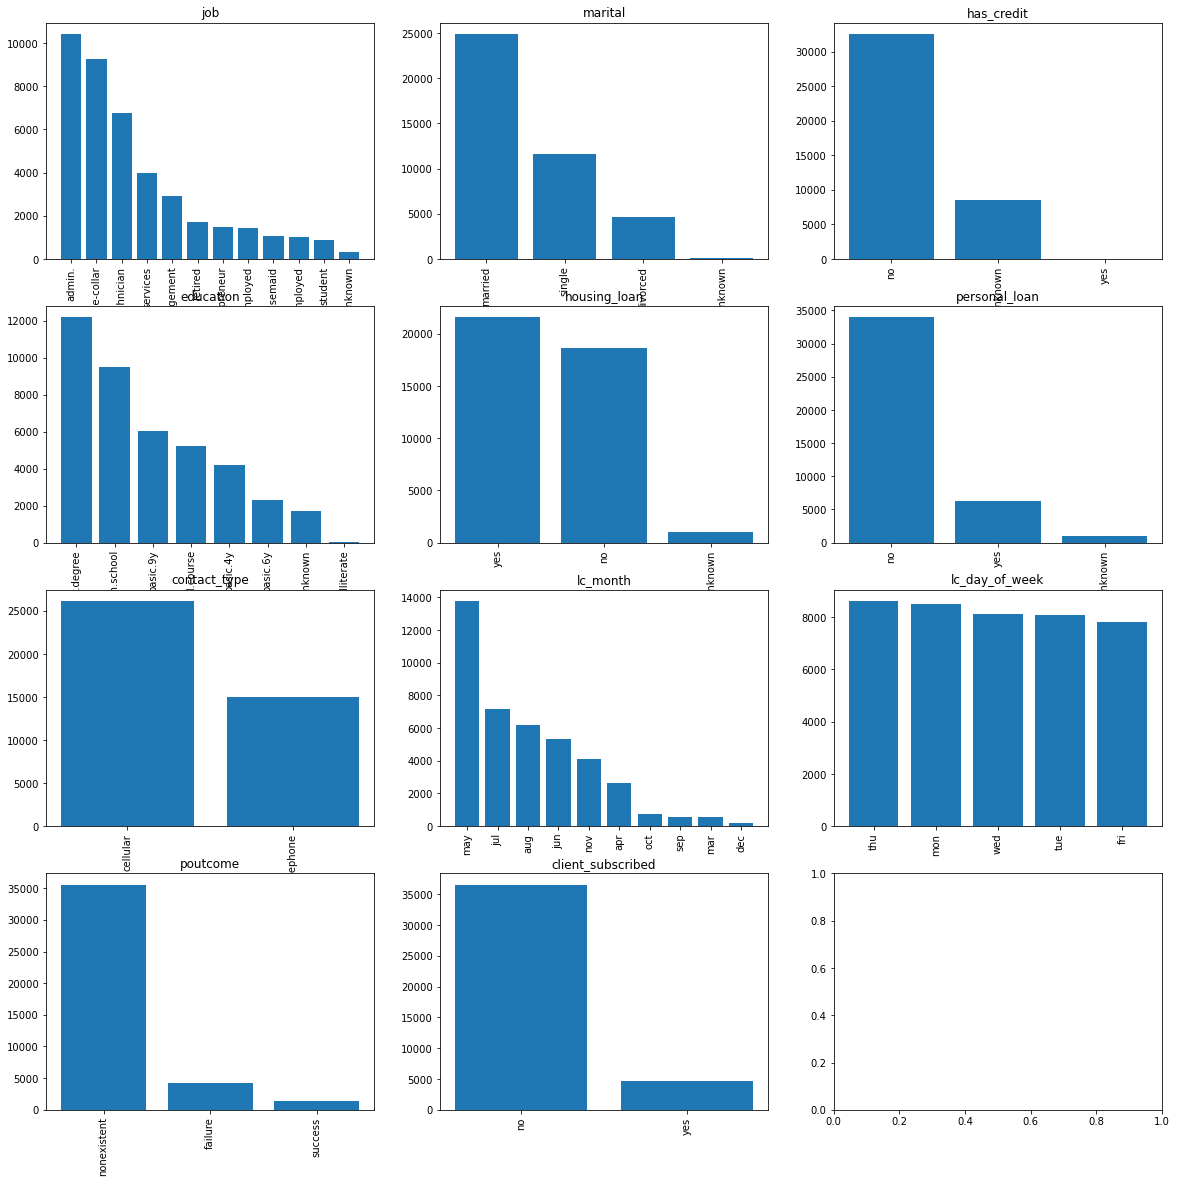

In [318]:
#Check for value counts of each categorical dataset in a graphical format
categorical_columns = ['job', 'marital', 'has_credit', 'education', 'housing_loan', 'personal_loan', 'contact_type', 'lc_month', 'lc_day_of_week','poutcome','client_subscribed']

categorical_columns

fig, axs = plt.subplots(4, 3, sharex=False, sharey=False, figsize=(20, 20))
counter = 0
for categorical_column in categorical_columns:
    value_counts = df[categorical_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(categorical_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

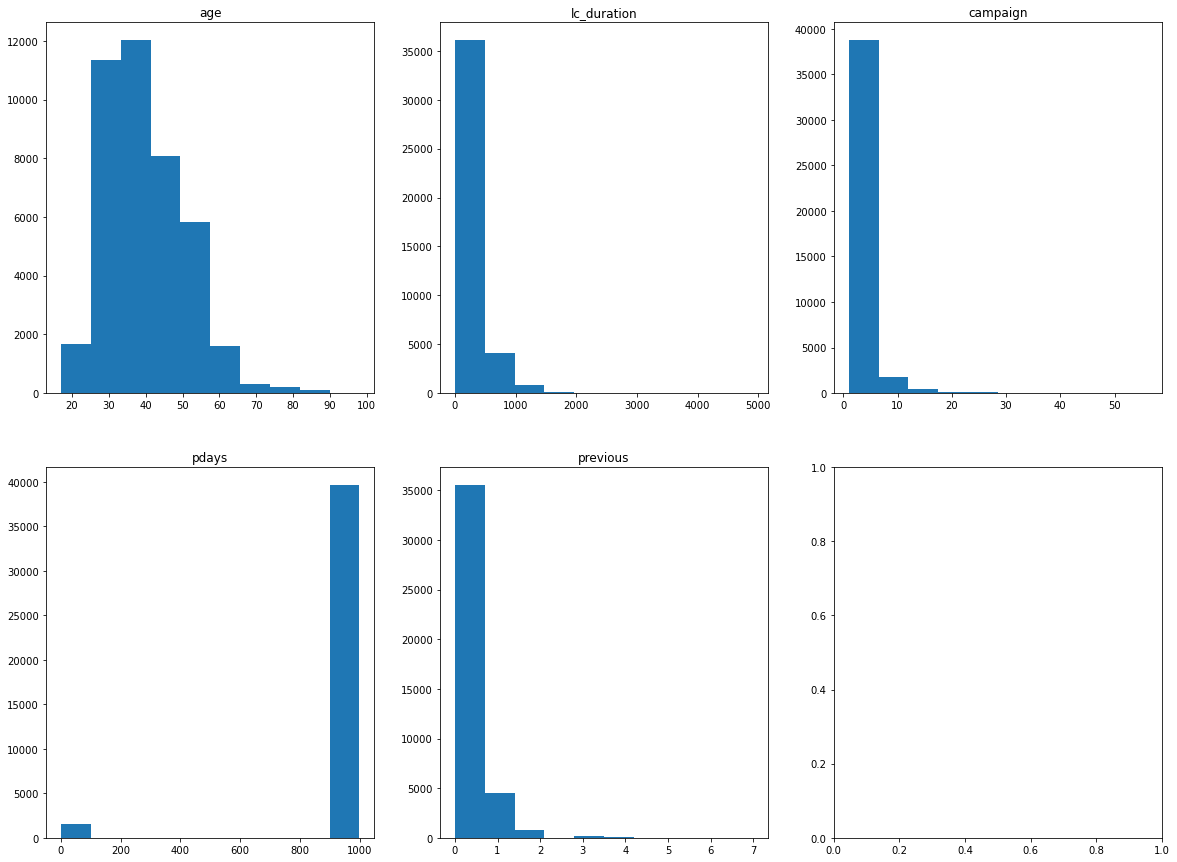

In [319]:
#Check for value counts of each numerical dataset in a graphical format
num_columns = ['age','lc_duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

In [320]:
# We can see that from above graphs, that numerical columns like 'Campaign', 'lc_duration', 'pdays', 'Campaign', and 'previous' have some outliers data

# PDAYS: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
print("pdays Below 200")
print(len (df[df['pdays'] < 200] ) / len(df) * 100)
print("pdays Below 700")
print(len (df[df['pdays'] < 700] ) / len(df) * 100)
print("pdays Above 800")
print(len (df[df['pdays'] >= 850] ) / len(df) * 100)
print("pdays Above 900")
print(len (df[df['pdays'] >= 850] ) / len(df) * 100)

# only 3.7% of values below 200 and below 700 too while majority of data i.e. 96.32% of values were above 800 and 900 threshold values. 



pdays Below 200
3.6793277637458717
pdays Below 700
3.6793277637458717
pdays Above 800
96.32067223625413
pdays Above 900
96.32067223625413


In [321]:
# Finding the correlation between the features and the target variable
def convert_yn_to_01(row, column_name):
    return 1 if row[column_name] == 'yes' else 0

df_obj = df.copy()
df_obj

bool_columns = ['client_subscribed']
for bool_col in bool_columns:
    df_obj[bool_col + '_updated'] = df.apply(lambda row: convert_yn_to_01(row, bool_col),axis=1)

df_obj = df_obj.drop(columns = bool_columns)
print(df_obj['client_subscribed_updated'].value_counts())
df_obj

0    36537
1     4639
Name: client_subscribed_updated, dtype: int64


,age,job,marital,education,has_credit,housing_loan,personal_loan,contact_type,lc_month,lc_day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,client_subscribed_updated
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [322]:
df_obj.corr()
# As seen below, the correlation is highest for lc_duration column but not much high so as to drop the column, we shall keep this
# variable as it could be one impacting input variable for prediction of our target

,age,lc_duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,client_subscribed_updated
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607,0.030381
lc_duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672,0.405297
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129,-0.066361
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659,-0.324948
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411,0.230202
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949,-0.298289
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945,-0.136134
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679,0.054802
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146,-0.307740
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000,-0.354669


In [23]:
# Duration has the highest correlation with the target variable, but the value isn't very high; Since it might be one of 
#the columns having high impact on the decision we should keep and check the model.

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                41176 non-null  int64  
 1   job                41176 non-null  object 
 2   marital            41176 non-null  object 
 3   education          41176 non-null  object 
 4   has_credit         41176 non-null  object 
 5   housing_loan       41176 non-null  object 
 6   personal_loan      41176 non-null  object 
 7   contact_type       41176 non-null  object 
 8   lc_month           41176 non-null  object 
 9   lc_day_of_week     41176 non-null  object 
 10  lc_duration        41176 non-null  int64  
 11  campaign           41176 non-null  int64  
 12  pdays              41176 non-null  int64  
 13  previous           41176 non-null  int64  
 14  poutcome           41176 non-null  object 
 15  emp.var.rate       41176 non-null  float64
 16  cons.price.idx     411

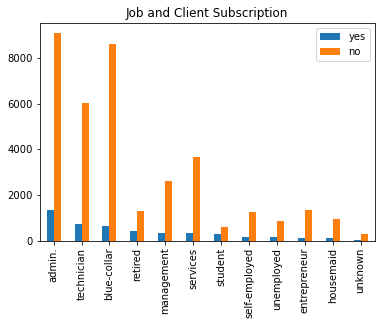

In [324]:
# Graphically checking the impact of the individual features on the target variable
j_df = pd.DataFrame()

j_df['yes'] = df[df['client_subscribed'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['client_subscribed'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and Client Subscription')

# As seen in the below chart; Clients with blue-collar and admin job types are less likely to subscribe for the bank product
# Non working clients are less likely to subscribe for the term deposit.

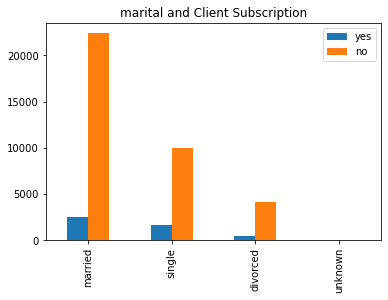

In [325]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['client_subscribed'] == 'yes']['marital'].value_counts()
j_df['no'] = df[df['client_subscribed'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'marital and Client Subscription')

# As seen in the below chart; married clients are less likely to subscribe for the bank product 

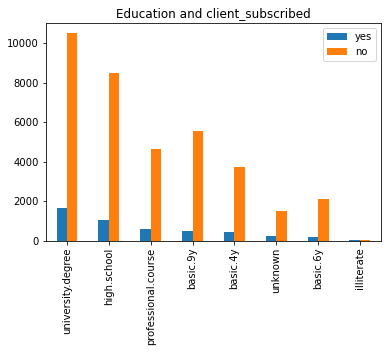

In [326]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['client_subscribed'] == 'yes']['education'].value_counts()
j_df['no'] = df[df['client_subscribed'] == 'no']['education'].value_counts()

j_df.plot.bar(title = 'Education and client_subscribed') 
# As seen in the below chart; University.degree holders are less likely to subscribe for the bank product

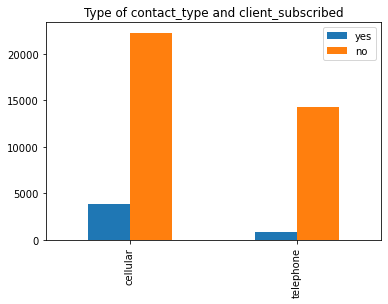

In [327]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['client_subscribed'] == 'yes']['contact_type'].value_counts()
j_df['no'] = df[df['client_subscribed'] == 'no']['contact_type'].value_counts()

j_df.plot.bar(title = 'Type of contact_type and client_subscribed')

# Clients contacted through Cellphones are less likely to subscribe for the Bank product 

'\nSo as seen in the graph below, it is less likely that a person having or not having a housing loan will subscribe for the bank product\nSo we can drop off this column if required as the dependency of this input variable and target seems less\n'

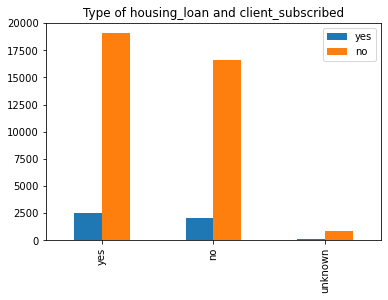

In [328]:
 j_df = pd.DataFrame()

j_df['yes'] = df[df['client_subscribed'] == 'yes']['housing_loan'].value_counts()
j_df['no'] = df[df['client_subscribed'] == 'no']['housing_loan'].value_counts()

j_df.plot.bar(title = 'Type of housing_loan and client_subscribed')

"""
So as seen in the graph below, it is less likely that a person having or not having a housing loan will subscribe for the bank product
So we can drop off this column if required as the dependency of this input variable and target seems less
"""

'\nSo as seen in the graph below, it is less likely that a person not having a personal_loan will subscribe for the bank product. \nMay be these campaigns were meant to target the clients having a personal loan.\n'

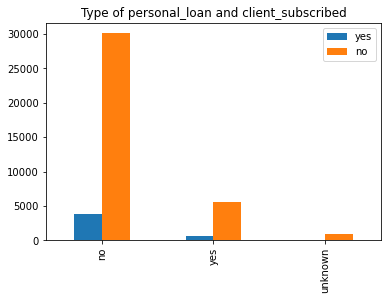

In [329]:
 j_df = pd.DataFrame()

j_df['yes'] = df[df['client_subscribed'] == 'yes']['personal_loan'].value_counts()
j_df['no'] = df[df['client_subscribed'] == 'no']['personal_loan'].value_counts()
j_df.plot.bar(title = 'Type of personal_loan and client_subscribed')

"""
So as seen in the graph below, it is less likely that a person not having a personal_loan will subscribe for the bank product. 
May be these campaigns were meant to target the clients having a personal loan.
"""

'\nHere, Clearly non existent campaigns will not have any subscription of the bank product. But, there are few campaigns with nonexistent outcome which have had "y" client subscription.\nSo we exactly don\'t know here that subscription was live for sometime and then was closed without concluding yes or no. \n'

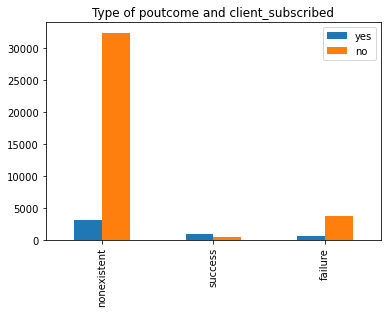

In [330]:
 j_df = pd.DataFrame()

j_df['yes'] = df[df['client_subscribed'] == 'yes']['poutcome'].value_counts()
j_df['no'] = df[df['client_subscribed'] == 'no']['poutcome'].value_counts()

j_df.plot.bar(title = 'Type of poutcome and client_subscribed')

"""
Here, Clearly non existent campaigns will not have any subscription of the bank product. But, there are few campaigns with nonexistent outcome which have had "y" client subscription.
So we exactly don't know here that subscription was live for sometime and then was closed without concluding yes or no. 
"""

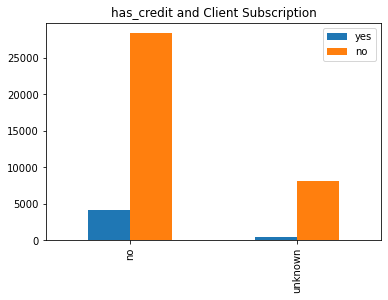

In [331]:
# Graphically checking the impact of the individual features on the target variable
j_df = pd.DataFrame()

j_df['yes'] = df[df['client_subscribed'] == 'yes']['has_credit'].value_counts()
j_df['no'] = df[df['client_subscribed'] == 'no']['has_credit'].value_counts()

j_df.plot.bar(title = 'has_credit and Client Subscription')

# As seen in the below chart; there is a possibility that if the client does not have a credit then he might not subscribe for 
# the term deposit

In [332]:
category_columns = df.select_dtypes(include='object').columns
numerical_columns= df.select_dtypes(exclude='object').columns

In [333]:
df[category_columns]

,job,marital,education,has_credit,housing_loan,personal_loan,contact_type,lc_month,lc_day_of_week,poutcome,client_subscribed
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [334]:
df[numerical_columns]

,age,lc_duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [335]:
# Data Preprocessing Step 
"""
1. Job - Here we can replace job titles with working or not working category; wherein retired, student, unemployed, unknown are categorised to not_working
and remaining job_titles into the working category. 
2. Marital - Here we can convert "single", "divorced", "unknown" (unknown to unmarried category because they are few 
in number and also married category has enough data) into a one category "unmarried" while remining ones into married.
3. Education - Here, we can do the following grouping:
    a. professional.course, university.degree - higher_education
    b. basic.4y, basic.6y, basic.9y, high school - basic_education
    c. illiterate, unknown - no_education
4. Data for the Month of January and February is not present
5. The source dataset mentions that data is available from 2008 to 2010 but year column is not mentioned in the excel file 
6. For pdays column, 999 means the client was not previously contacted; Here as seen in the below charts 96% of crowd is marked 
999 while remaining ones merely add to 4%; And the other column named "previous" suggests the number of contacts performed before this campaign and for the given 
client (numeric). So, we can go with either of the columns for our modelling purpose.
So, here we can convert the column "previous" to a binary keys with categorical values: "contacted" and "not contacted".
This will be a part of data cleaning Process.
"""

'\n1. Job - Here we can replace job titles with working or not working category; wherein retired, student, unemployed, unknown are categorised to not_working\nand remaining job_titles into the working category. \n2. Marital - Here we can convert "single", "divorced", "unknown" (unknown to unmarried category because they are few \nin number and also married category has enough data) into a one category "unmarried" while remining ones into married.\n3. Education - Here, we can do the following grouping:\n    a. professional.course, university.degree - higher_education\n    b. basic.4y, basic.6y, basic.9y, high school - basic_education\n    c. illiterate, unknown - no_education\n4. Data for the Month of January and February is not present\n5. The source dataset mentions that data is available from 2008 to 2010 but year column is not mentioned in the excel file \n6. For pdays column, 999 means the client was not previously contacted; Here as seen in the below charts 96% of crowd is marked 

In [336]:
# 0: not_working; 1: working
def convert_job_title(row, column_name):
    return 0 if row[column_name] == 'retired' or row[column_name] == 'student' or row[column_name] == 'unemployed' or row[column_name] == 'unknown' else 1

df['job' + '_updated'] = df.apply(lambda row: convert_job_title(row, 'job'),axis=1)

print(df['job_updated'].unique())

[1 0]


In [337]:
# 0: unmarried; 1: married
def convert_marital_status(row, column_name):
    return 0 if row[column_name] == 'divorced' or row[column_name] == 'single' else 1

df['marital' + '_updated'] = df.apply(lambda row: convert_marital_status(row, 'marital'),axis=1)

print(df['marital_updated'].unique())

[1 0]


In [338]:
def convert_education_status(row, column_name):
    if row[column_name] == 'professional.course' or row[column_name] == 'university.degree':
        return 'higher_education'
    elif row[column_name] == 'basic.4y' or row[column_name] == 'basic.6y' or row[column_name] == 'basic.9y' or row[column_name] == 'high school':
        return 'basic_education'
    else: return 'no_education'

df['education' + '_updated'] = df.apply(lambda row: convert_education_status(row, 'education'),axis=1)

print(df['education_updated'].unique())

['basic_education' 'no_education' 'higher_education']


In [339]:
def check_ploan_status(row, column_name):
    return 0 if (row[column_name] == 'no' or row[column_name] == 'unknown') else 1 

df['housing_loan_updated'] = df.apply(lambda row: check_ploan_status(row, 'housing_loan'),axis=1)

print(df['housing_loan_updated'].unique())

[0 1]


In [340]:
def check_hloan_status(row, column_name):
    return 0 if (row[column_name] == 'no' or row[column_name] == 'unknown') else 1 

df['personal_loan_updated'] = df.apply(lambda row: check_hloan_status(row, 'personal_loan'),axis=1)

print(df['personal_loan_updated'].unique())

[0 1]


In [341]:
# 0: cellular; 1: telephone
def update_contact_status(row, column_name):
    return 1 if row[column_name] == 'cellular' else 0

df['contact_type' + '_updated'] = df.apply(lambda row: update_contact_status(row, 'contact_type'),axis=1)

print(df['contact_type_updated'].unique())

[0 1]


In [342]:
# 0: not_contacted; 1: contacted
def update_previous_status(row, column_name):
    return 0 if row[column_name] == 0 else 1

df['contacted_previously'] = df.apply(lambda row: update_previous_status(row, 'previous'),axis=1)

print(df['contacted_previously'].unique())

[0 1]


In [343]:
# 0: not_contacted; 1: contacted
def has_credit_update(row, column_name):
    return 0 if (row[column_name] == 'no' or row[column_name] == 'unknown') else 1 

df['has_credit_updated'] = df.apply(lambda row: has_credit_update(row, 'has_credit'),axis=1)

print(df['has_credit_updated'].unique())

[0 1]


In [344]:
# Convert the target variable to numeric 1/0 type
def convert_yn_to_01(row, column_name):
    return 1 if row[column_name] == 'yes' else 0

bool_columns = ['client_subscribed']
for bool_col in bool_columns:
    df['client_subscribed' + '_updated'] = df.apply(lambda row: convert_yn_to_01(row, 'client_subscribed'),axis=1)

print(df['client_subscribed_updated'].unique())

[0 1]


In [345]:
df

,age,job,marital,education,has_credit,housing_loan,personal_loan,contact_type,lc_month,lc_day_of_week,...,client_subscribed,job_updated,marital_updated,education_updated,housing_loan_updated,personal_loan_updated,contact_type_updated,contacted_previously,has_credit_updated,client_subscribed_updated
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,no,1,1,basic_education,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,no,1,1,no_education,0,0,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,no,1,1,no_education,1,0,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,no,1,1,basic_education,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,no,1,1,no_education,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,yes,0,1,higher_education,1,0,1,0,0,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,no,1,1,higher_education,0,0,1,0,0,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,no,0,1,higher_education,1,0,1,0,0,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,yes,1,1,higher_education,0,0,1,0,0,1


In [346]:
df_raw=df.copy()

In [347]:
df_cleaned=df.copy()
df_cleaned

,age,job,marital,education,has_credit,housing_loan,personal_loan,contact_type,lc_month,lc_day_of_week,...,client_subscribed,job_updated,marital_updated,education_updated,housing_loan_updated,personal_loan_updated,contact_type_updated,contacted_previously,has_credit_updated,client_subscribed_updated
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,no,1,1,basic_education,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,no,1,1,no_education,0,0,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,no,1,1,no_education,1,0,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,no,1,1,basic_education,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,no,1,1,no_education,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,yes,0,1,higher_education,1,0,1,0,0,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,no,1,1,higher_education,0,0,1,0,0,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,no,0,1,higher_education,1,0,1,0,0,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,yes,1,1,higher_education,0,0,1,0,0,1


In [348]:
df_cleaned = df_cleaned.drop(['job', 'marital', 'education', 'housing_loan', 'housing_loan_updated','pdays','has_credit', 'personal_loan', 'previous', 'contact_type', 'lc_day_of_week', 'client_subscribed'], axis = 1) 

In [349]:
df_cleaned

,age,lc_month,lc_duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_updated,marital_updated,education_updated,personal_loan_updated,contact_type_updated,contacted_previously,has_credit_updated,client_subscribed_updated
0,56,may,261,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1,1,basic_education,0,0,0,0,0
1,57,may,149,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1,1,no_education,0,0,0,0,0
2,37,may,226,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1,1,no_education,0,0,0,0,0
3,40,may,151,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1,1,basic_education,0,0,0,0,0
4,56,may,307,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1,1,no_education,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,nov,334,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,1,higher_education,0,1,0,0,1
41184,46,nov,383,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,1,higher_education,0,1,0,0,0
41185,56,nov,189,2,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,1,higher_education,0,1,0,0,0
41186,44,nov,442,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,1,higher_education,0,1,0,0,1


In [350]:
category_columns = df_raw.select_dtypes(include='object').columns
numerical_columns= df_raw.select_dtypes(exclude='object').columns

In [351]:
# Dropping the columns for which we have label encoded
df_raw = df_raw.drop(['job', 'marital', 'education', 'previous', 'contact_type', 'client_subscribed'], axis = 1) 

In [352]:
# label_encoder object knows how to understand word labels. 
from sklearn.preprocessing import LabelEncoder

category_columns = df_raw.select_dtypes(include='object').columns
numerical_columns= df_raw.select_dtypes(exclude='object').columns

df_raw_cleaned_num = df_raw[category_columns].apply(LabelEncoder().fit_transform)

In [353]:
dummies_final_data_set = pd.DataFrame()

for col in category_columns:
    #print(df_raw_cleaned_num[col].unique())
    col_vals = [vals for vals in df_raw_cleaned_num[col].unique()]
    onehot_cols = [col + '_' + str(s) for s in col_vals]
    dummies_train = pd.get_dummies(df_raw_cleaned_num[col], prefix=col)
    dummies_final_data_set = pd.concat([dummies_final_data_set , dummies_train], axis=1)


In [354]:
df_raw_final = pd.concat([dummies_final_data_set, df_raw[numerical_columns]], axis = 1)
df_raw_final

,has_credit_0,has_credit_1,has_credit_2,housing_loan_0,housing_loan_1,housing_loan_2,personal_loan_0,personal_loan_1,personal_loan_2,lc_month_0,...,euribor3m,nr.employed,job_updated,marital_updated,housing_loan_updated,personal_loan_updated,contact_type_updated,contacted_previously,has_credit_updated,client_subscribed_updated
0,1,0,0,1,0,0,1,0,0,0,...,4.857,5191.0,1,1,0,0,0,0,0,0
1,0,1,0,1,0,0,1,0,0,0,...,4.857,5191.0,1,1,0,0,0,0,0,0
2,1,0,0,0,0,1,1,0,0,0,...,4.857,5191.0,1,1,1,0,0,0,0,0
3,1,0,0,1,0,0,1,0,0,0,...,4.857,5191.0,1,1,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,1,0,...,4.857,5191.0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1,0,0,0,0,1,1,0,0,0,...,1.028,4963.6,0,1,1,0,1,0,0,1
41184,1,0,0,1,0,0,1,0,0,0,...,1.028,4963.6,1,1,0,0,1,0,0,0
41185,1,0,0,0,0,1,1,0,0,0,...,1.028,4963.6,0,1,1,0,1,0,0,0
41186,1,0,0,1,0,0,1,0,0,0,...,1.028,4963.6,1,1,0,0,1,0,0,1


In [355]:
X = df_raw_final.iloc[:, :45].values
y = df_raw_final.iloc[:, 46].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [356]:
# Decision Tree for Raw data input
X_train_dt_raw = X_train
X_test_dt_raw = X_test 
y_train_dt_raw = y_train 
y_test_dt_raw = y_test

print("Decision Tree implementation:")
print()
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_dt_raw = sc.fit_transform(X_train_dt_raw)
X_test_dt_raw = sc.transform(X_test_dt_raw)

# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_raw=DecisionTreeClassifier(criterion='entropy', random_state=550, max_depth=5)
classifier_raw.fit(X_train_dt_raw,y_train_dt_raw)
# Predicting the Test set results
y_pred_dt_raw = classifier_raw.predict(X_test_dt_raw)

# Predicting the train set results 
y_pred_train_dt_raw = classifier_raw.predict(X_train_dt_raw)

Decision Tree implementation:



In [357]:

# Naive Bayes Learner for Raw data input
X_train_nb_raw = X_train
X_test_nb_raw = X_test 
y_train_nb_raw = y_train 
y_test_nb_raw = y_test

print("Naive Bayes Learner: Gaussian")
print()
from sklearn.naive_bayes import GaussianNB


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_nb_raw = sc.fit_transform(X_train_nb_raw)
X_test_nb_raw = sc.transform(X_test_nb_raw)


# instantiate the model
gnb_raw = GaussianNB()

# fit the model
gnb_raw.fit(X_train_nb_raw, y_train_nb_raw)

# Predict the Test result set 
y_pred_nb_raw = gnb_raw.predict(X_test_nb_raw)

# Predict the Train Result Set
y_pred_train_nb_raw = gnb_raw.predict(X_train_nb_raw)



Naive Bayes Learner: Gaussian



Minimum error:- 0.09125027595849584 at K = 12


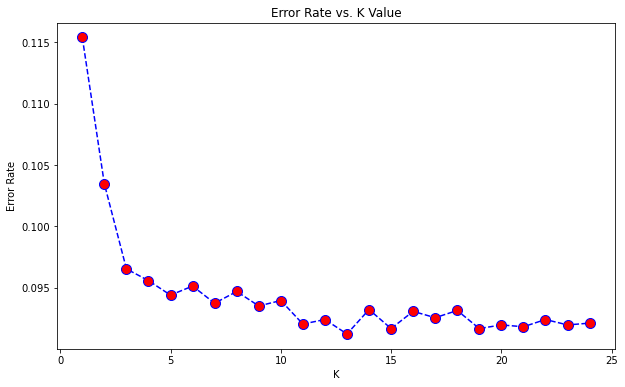

In [358]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_train_knn_raw = X_train
X_test_knn_raw = X_test 
y_train_knn_raw = y_train 
y_test_knn_raw = y_test
error_rate = []
for i in range(1,25):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_knn_raw,y_train_knn_raw)
 pred_i = knn.predict(X_test_knn_raw)
 error_rate.append(np.mean(pred_i != y_test_knn_raw))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [359]:
# KNN algorithm for raw data input

X_train_knn_raw = X_train
X_test_knn_raw = X_test 
y_train_knn_raw = y_train 
y_test_knn_raw = y_test

print("KNN Algorithm")
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_knn_raw)
X_train_knn_raw = scaler.transform(X_train_knn_raw)
X_test_knn_raw = scaler.transform(X_test_knn_raw)

# Fit the model
from sklearn.neighbors import KNeighborsClassifier
knn_classifier_raw = KNeighborsClassifier(n_neighbors = 13)
knn_classifier_raw.fit(X_train_knn_raw, y_train_knn_raw)

y_pred_knn_raw = knn_classifier_raw.predict(X_test_knn_raw)
y_pred_train_knn_raw = knn_classifier_raw.predict(X_train_knn_raw)


KNN Algorithm


In [360]:
# SVM Algorithm for raw data input
X_train_svc_raw = X_train
X_test_svc_raw = X_test 
y_train_svc_raw = y_train 
y_test_svc_raw = y_test

print("SVM Tree implementation:")
print()
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_svc_raw = sc.fit_transform(X_train_svc_raw)
X_test_svc_raw = sc.transform(X_test_svc_raw)


from sklearn.svm import SVC
svc_raw= SVC(kernel = 'sigmoid', probability=True)
svc_raw = svc_raw.fit(X_train_svc_raw, y_train_svc_raw)
svcpred_raw = svc_raw.predict(X_test_svc_raw)
svcpred_train_raw = svc_raw.predict(X_train_svc_raw)


SVM Tree implementation:



In [361]:
print("Raw data report:")
print("######################################################################################################")
from sklearn.metrics import accuracy_score

print('Decision Tree Training set accuracy score: {:.4f}'.format(accuracy_score(y_train_dt_raw, y_pred_train_dt_raw)))
print('Decision Tree Test set accuracy score: {:.4f}'.format(accuracy_score(y_test_dt_raw, y_pred_dt_raw)))
print('Naive Bayes Training set accuracy score: {:.4f}'.format(accuracy_score(y_train_nb_raw, y_pred_train_nb_raw)))
print('Naive Bayes Test set accuracy score: {:.4f}'.format(accuracy_score(y_test_nb_raw, y_pred_nb_raw)))
print("KNN Accuracy for train Data:",accuracy_score(y_train_knn_raw,y_pred_train_knn_raw))
print("KNN Accuracy for test Data:",accuracy_score(y_test_knn_raw,y_pred_knn_raw))
print("SVM Accuracy for test Data:",accuracy_score(y_test_svc_raw,svcpred_raw))
print("SVM Accuracy for train Data:",accuracy_score(y_train_svc_raw,svcpred_train_raw))

print("######################################################################################################")

# Find the confusion matrix:
from sklearn.metrics import confusion_matrix
cm_dt_raw = confusion_matrix(y_test_dt_raw, y_pred_dt_raw)
print()
print("Decision Tree Confusion Matrix:")
print(cm_dt_raw)

cm_nb_raw = confusion_matrix(y_test_nb_raw, y_pred_nb_raw)
print("Naive Bayes Confusion Matrix:")
print(cm_nb_raw)

cm_knn_raw = confusion_matrix(y_test_knn_raw, y_pred_knn_raw)
print("KNN Confusion Matrix:")
print(cm_knn_raw)

print("SVM Confusion Matrix")
print(confusion_matrix(y_test_svc_raw, svcpred_raw)) 
print("######################################################################################################")


from sklearn.metrics import classification_report
print()
print("Decision Tree Classification Report:")
print(classification_report(y_test_dt_raw, y_pred_dt_raw))

print()
print("Naive Bayes Classification Report:")
print(classification_report(y_test_nb_raw, y_pred_nb_raw))

print()
print("KNN Classification Report:",)
print (classification_report(y_test_knn_raw, y_pred_knn_raw))

print()
print("SVM Classification Report:",)
print (classification_report(y_test_svc_raw, svcpred_raw))
print("######################################################################################################")


Raw data report:
######################################################################################################
Decision Tree Training set accuracy score: 0.9171
Decision Tree Test set accuracy score: 0.9113
Naive Bayes Training set accuracy score: 0.7177
Naive Bayes Test set accuracy score: 0.7207
KNN Accuracy for train Data: 0.9106825678761735
KNN Accuracy for test Data: 0.8989623960556332
SVM Accuracy for test Data: 0.8742365148281699
SVM Accuracy for train Data: 0.8734186392141225
######################################################################################################

Decision Tree Confusion Matrix:
[[11543   471]
 [  734   841]]
Naive Bayes Confusion Matrix:
[[8461 3553]
 [ 242 1333]]
KNN Confusion Matrix:
[[11773   241]
 [ 1132   443]]
SVM Confusion Matrix
[[11221   793]
 [  916   659]]
######################################################################################################

Decision Tree Classification Report:
              precision    recal

In [362]:
from sklearn import metrics
print("Comparison model for raw data input")
# Comparison Model for all four algorithms on raw data input

#Decision Tree
DT = round(classifier_raw.score(X_test_dt_raw, y_test_dt_raw), 2) 
mae_dt = round(metrics.mean_absolute_error(y_test_dt_raw, y_pred_dt_raw), 4) 
mse_dt = round(metrics.mean_squared_error(y_test_dt_raw, y_pred_dt_raw), 4) 

#Naive Bayes
NB = round(gnb_raw.score(X_test_nb_raw, y_test_nb_raw), 2) 
mae_nb = round(metrics.mean_absolute_error(y_test_nb_raw, y_pred_nb_raw), 4) 
mse_nb = round(metrics.mean_squared_error(y_test_nb_raw, y_pred_nb_raw), 4) 

# KNN   
KNN = round(knn_classifier_raw.score(X_test_knn_raw, y_test_knn_raw), 2) 
mae_knn = metrics.mean_absolute_error(y_test_knn_raw, y_pred_knn_raw) 
mse_knn = metrics.mean_squared_error(y_test_knn_raw, y_pred_knn_raw) 

# SVM 
SVM = round(svc_raw.score(X_test_svc_raw, y_test_svc_raw), 2) 
mae_svm = metrics.mean_absolute_error(y_test_svc_raw, svcpred_raw) 
mse_svm = metrics.mean_squared_error(y_test_svc_raw, svcpred_raw) 


compare_models = pd.DataFrame( 
    {  'Model' : ['DT', 'NB', 'KNN', 'SVM'], 
       'Score' : [DT, NB, KNN, SVM], 
        'MAE'  : [mae_dt, mae_nb, mae_knn, mae_svm], 
        'MSE'  : [mse_dt, mse_nb, mse_knn, mse_svm] 
    }) 

print("Test Data Comparison Model")
print(compare_models)


# Train Data 

#Decision Tree
DT = round(classifier_raw.score(X_train_dt_raw, y_train_dt_raw), 2) 
mae_dt = round(metrics.mean_absolute_error(y_train_dt_raw, y_pred_train_dt_raw), 4) 
mse_dt = round(metrics.mean_squared_error(y_train_dt_raw, y_pred_train_dt_raw), 4) 

#Naive Bayes
NB = round(gnb_raw.score(X_train_nb_raw, y_train_nb_raw), 2) 
mae_nb = round(metrics.mean_absolute_error(y_train_nb_raw, y_pred_train_nb_raw), 4) 
mse_nb = round(metrics.mean_squared_error(y_train_nb_raw, y_pred_train_nb_raw), 4) 

# KNN   
KNN = round(knn_classifier_raw.score(X_train_knn_raw, y_train_knn_raw), 2) 
mae_knn = metrics.mean_absolute_error(y_train_knn_raw, y_pred_train_knn_raw) 
mse_knn = metrics.mean_squared_error(y_train_knn_raw, y_pred_train_knn_raw) 

# SVM 
SVM = round(svc_raw.score(X_train_svc_raw, y_train_svc_raw), 2) 
mae_svm = metrics.mean_absolute_error(y_train_svc_raw, svcpred_train_raw) 
mse_svm = metrics.mean_squared_error(y_train_svc_raw, svcpred_train_raw) 


compare_models = pd.DataFrame( 
    {  'Model' : ['DT', 'NB', 'KNN', 'SVM'], 
       'Score' : [DT, NB, KNN, SVM], 
        'MAE'  : [mae_dt, mae_nb, mae_knn, mae_svm], 
        'MSE'  : [mse_dt, mse_nb, mse_knn, mse_svm] 
    }) 
print("Train Data Comparison Model")
print(compare_models)

Comparison model for raw data input
Test Data Comparison Model
  Model  Score       MAE       MSE
0    DT   0.91  0.088700  0.088700
1    NB   0.72  0.279300  0.279300
2   KNN   0.90  0.101038  0.101038
3   SVM   0.87  0.125763  0.125763
Train Data Comparison Model
  Model  Score       MAE       MSE
0    DT   0.92  0.082900  0.082900
1    NB   0.72  0.282300  0.282300
2   KNN   0.91  0.089317  0.089317
3   SVM   0.87  0.126581  0.126581


Raw data input ROC Curve


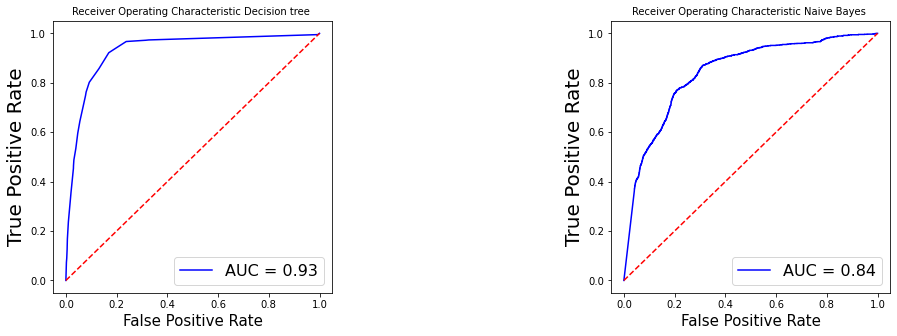

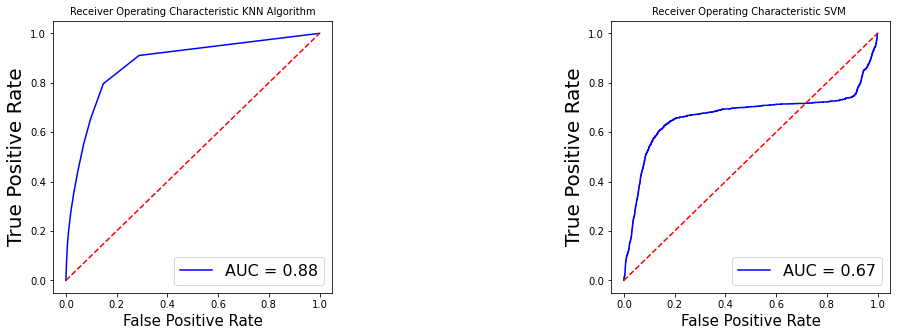

In [363]:
# Plot ROC curve for raw data input
print("Raw data input ROC Curve")
from sklearn import metrics
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
probs = classifier_raw.predict_proba(X_test_dt_raw)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test_dt_raw, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)
ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Decision tree ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)


#from sklearn import metrics

#fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5))
probs = gnb_raw.predict_proba(X_test_nb_raw)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test_nb_raw, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)
ax1.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Receiver Operating Characteristic Naive Bayes ',fontsize=10)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)


#from sklearn import metrics

fig, (ax2, ax3) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
probs = knn_classifier_raw.predict_proba(X_test_knn_raw)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test_knn_raw, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)
ax2.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax2.plot([0, 1], [0, 1],'r--')
ax2.set_title('Receiver Operating Characteristic KNN Algorithm',fontsize=10)
ax2.set_ylabel('True Positive Rate',fontsize=20)
ax2.set_xlabel('False Positive Rate',fontsize=15)
ax2.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)


#from sklearn import metrics

#fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5))
probs = svc_raw.predict_proba(X_test_svc_raw)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test_svc_raw, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)
ax3.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax3.plot([0, 1], [0, 1],'r--')
ax3.set_title('Receiver Operating Characteristic SVM ',fontsize=10)
ax3.set_ylabel('True Positive Rate',fontsize=20)
ax3.set_xlabel('False Positive Rate',fontsize=15)
ax3.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)



In [ ]:
# Create models on preprocessed data

In [364]:
category_columns = df_cleaned.select_dtypes(include='object').columns
numerical_columns= df_cleaned.select_dtypes(exclude='object').columns

In [365]:
# label_encoder object knows how to understand word labels. 
from sklearn.preprocessing import LabelEncoder

category_columns = df_cleaned.select_dtypes(include='object').columns
numerical_columns= df_cleaned.select_dtypes(exclude='object').columns

df_cleaned_num = df_cleaned[category_columns].apply(LabelEncoder().fit_transform)

In [366]:
dummies_final_data_set = pd.DataFrame()

for col in category_columns:
    col_vals = [vals for vals in df_cleaned_num[col].unique()]
    onehot_cols = [col + '_' + str(s) for s in col_vals]
    dummies_train = pd.get_dummies(df_cleaned_num[col], prefix=col)
    dummies_final_data_set = pd.concat([dummies_final_data_set , dummies_train], axis=1)


In [367]:
df_preprocessed = pd.concat([dummies_final_data_set, df_cleaned[numerical_columns]], axis = 1)

In [368]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   lc_month_0                 41176 non-null  uint8  
 1   lc_month_1                 41176 non-null  uint8  
 2   lc_month_2                 41176 non-null  uint8  
 3   lc_month_3                 41176 non-null  uint8  
 4   lc_month_4                 41176 non-null  uint8  
 5   lc_month_5                 41176 non-null  uint8  
 6   lc_month_6                 41176 non-null  uint8  
 7   lc_month_7                 41176 non-null  uint8  
 8   lc_month_8                 41176 non-null  uint8  
 9   lc_month_9                 41176 non-null  uint8  
 10  poutcome_0                 41176 non-null  uint8  
 11  poutcome_1                 41176 non-null  uint8  
 12  poutcome_2                 41176 non-null  uint8  
 13  education_updated_0        41176 non-null  uin

In [369]:
X = df_preprocessed.iloc[:, :29].values
y = df_preprocessed.iloc[:, 30].values

In [370]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 550)

In [372]:
# Decision Tree
X_train_dt = X_train
X_test_dt = X_test 
y_train_dt = y_train 
y_test_dt = y_test

print("Decision Tree implementation:")
print()
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_dt = sc.fit_transform(X_train_dt)
X_test_dt = sc.transform(X_test_dt)

# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy', random_state=550, max_depth=6)
classifier.fit(X_train_dt,y_train_dt)
# Predicting the Test set results
y_pred_dt = classifier.predict(X_test_dt)

# Predicting the train set results 
y_pred_train_dt = classifier.predict(X_train_dt)

print(accuracy_score(y_test_dt, y_pred_dt))

Decision Tree implementation:

0.9152255500772684


In [61]:
"""
Accuracy (Depth = 1): 0.883803076017367
Accuracy (Depth = 2): 0.9017587754801678
Accuracy (Depth = 3): 0.9017587754801678
Accuracy (Depth = 4): 0.9130178821105306
Accuracy (Depth = 5): 0.9147104275516962
Accuracy (Depth = 6): 0.9152255500772684
Accuracy (Depth = 7): 0.9111781588049157
Accuracy (Depth = 8): 0.9133858267716536
Accuracy (Depth = 9): 0.9126499374494076
Accuracy (Depth =10): 0.9091912576348518
Accuracy (Depth =11): 0.9033777319891089
Accuracy (Depth =12): 0.9020531312090662

We would consider the depth = 6 for our model
"""

'\nAccuracy (Depth = 1): 0.883803076017367\nAccuracy (Depth = 2): 0.9017587754801678\nAccuracy (Depth = 3): 0.9017587754801678\nAccuracy (Depth = 4): 0.9130178821105306\nAccuracy (Depth = 5): 0.9147104275516962\nAccuracy (Depth = 6): 0.9152255500772684\nAccuracy (Depth = 7): 0.9111781588049157\nAccuracy (Depth = 8): 0.9133858267716536\nAccuracy (Depth = 9): 0.9126499374494076\nAccuracy (Depth =10): 0.9091912576348518\nAccuracy (Depth =11): 0.9033777319891089\nAccuracy (Depth =12): 0.9020531312090662\n\nWe would consider the depth = 6 for our model\n'

In [373]:
from sklearn import tree
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_23 <= -1.11
|   |--- feature_17 <= -0.38
|   |   |--- feature_17 <= -0.74
|   |   |   |--- class: 0
|   |   |--- feature_17 >  -0.74
|   |   |   |--- feature_17 <= -0.51
|   |   |   |   |--- feature_12 <= 2.63
|   |   |   |   |   |--- feature_17 <= -0.69
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_17 >  -0.69
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_12 >  2.63
|   |   |   |   |   |--- feature_17 <= -0.63
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_17 >  -0.63
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_17 >  -0.51
|   |   |   |   |--- feature_20 <= 0.65
|   |   |   |   |   |--- feature_12 <= 2.63
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_12 >  2.63
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_20 >  0.65
|   |   |   |   |   |--- feature_17 <= -0.46
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_17 >  -0

In [374]:
# Naive Bayes Learner 
X_train_nb = X_train
X_test_nb = X_test 
y_train_nb = y_train 
y_test_nb = y_test

print("Naive Bayes Learner: Gaussian")
print()
from sklearn.naive_bayes import GaussianNB

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_nb = sc.fit_transform(X_train_nb)
X_test_nb = sc.transform(X_test_nb)

# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train_nb, y_train_nb)
# Predict the Test result set 
y_pred_nb = gnb.predict(X_test_nb)
# Predict the Train Result Set
y_pred_train_nb = gnb.predict(X_train_nb)

Naive Bayes Learner: Gaussian



In [375]:
df_raw=df_original.copy()

Minimum error:- 0.0916918095518434 at K = 16


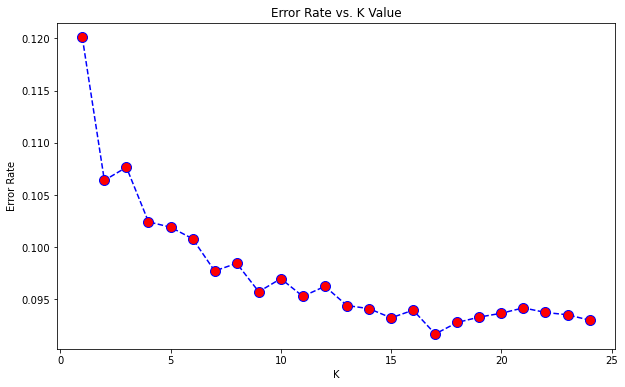

In [376]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_train_knn = X_train
X_test_knn = X_test 
y_train_knn = y_train 
y_test_knn = y_test
error_rate = []
for i in range(1,25):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_knn,y_train_knn)
 pred_i = knn.predict(X_test_knn)
 error_rate.append(np.mean(pred_i != y_test_knn))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [377]:
# KNN algorithm # We will choose K = 17 as error rate seems minimal at this point

X_train_knn = X_train
X_test_knn = X_test 
y_train_knn = y_train 
y_test_knn = y_test

print("KNN Algorithm")
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_knn)
X_train_knn = scaler.transform(X_train_knn)
X_test_knn = scaler.transform(X_test_knn)
# Fit the model
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 17)
knn_classifier.fit(X_train_knn, y_train_knn)
y_pred_knn = knn_classifier.predict(X_test_knn)
y_pred_train_knn = knn_classifier.predict(X_train_knn)


KNN Algorithm


In [378]:
X_train_svc = X_train
X_test_svc = X_test 
y_train_svc = y_train 
y_test_svc = y_test

print("SVM Tree implementation:")
print()
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_svc = sc.fit_transform(X_train_svc)
X_test_svc = sc.transform(X_test_svc)
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid', probability=True)
svc = svc.fit(X_train_svc, y_train_svc)
svcpred = svc.predict(X_test_svc)
svcpred_train = svc.predict(X_train_svc)


SVM Tree implementation:



In [380]:
print("######################################################################################################")
from sklearn.metrics import accuracy_score

print('Decision Tree Training set accuracy score: {:.4f}'.format(accuracy_score(y_train_dt, y_pred_train_dt)))
print('Decision Tree Test set accuracy score: {:.4f}'.format(accuracy_score(y_test_dt, y_pred_dt)))
print('Naive Bayes Training set accuracy score: {:.4f}'.format(accuracy_score(y_train_nb, y_pred_train_nb)))
print('Naive Bayes Test set accuracy score: {:.4f}'.format(accuracy_score(y_test_nb, y_pred_nb)))
print("KNN Accuracy for train Data:",accuracy_score(y_train_knn,y_pred_train_knn))
print("KNN Accuracy for test Data:",accuracy_score(y_test_knn,y_pred_knn))
print("SVM Accuracy for test Data:",accuracy_score(y_test_svc,svcpred))
print("SVM Accuracy for train Data:",accuracy_score(y_train_svc,svcpred_train))

print("######################################################################################################")

# Find the confusion matrix:
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test_dt, y_pred_dt)
print()
print("Decision Tree Confusion Matrix:")
print(cm_dt)

cm_nb = confusion_matrix(y_test_nb, y_pred_nb)
print("Naive Bayes Confusion Matrix:")
print(cm_nb)

cm_knn = confusion_matrix(y_test_knn, y_pred_knn)
print("KNN Confusion Matrix:")
print(cm_knn)

print("SVM Confusion Matrix")
print(confusion_matrix(y_test_svc, svcpred)) 
print("######################################################################################################")


from sklearn.metrics import classification_report
print()
print("Decision Tree Classification Report:")
print(classification_report(y_test_dt, y_pred_dt))

print()
print("Naive Bayes Classification Report:")
print(classification_report(y_test_nb, y_pred_nb))

print()
print("KNN Classification Report:",)
print (classification_report(y_test_knn, y_pred_knn))

print()
print("SVM Classification Report:",)
print (classification_report(y_test_svc, svcpred))
print("######################################################################################################")


######################################################################################################
Decision Tree Training set accuracy score: 0.9185
Decision Tree Test set accuracy score: 0.9152
Naive Bayes Training set accuracy score: 0.8653
Naive Bayes Test set accuracy score: 0.8615
KNN Accuracy for train Data: 0.9122050241055569
KNN Accuracy for test Data: 0.9049230995658253
SVM Accuracy for test Data: 0.8675399219957318
SVM Accuracy for train Data: 0.8685250299053903
######################################################################################################

Decision Tree Confusion Matrix:
[[11599   411]
 [  741   838]]
Naive Bayes Confusion Matrix:
[[10879  1131]
 [  751   828]]
KNN Confusion Matrix:
[[11724   286]
 [ 1006   573]]
SVM Confusion Matrix
[[11141   869]
 [  931   648]]
######################################################################################################

Decision Tree Classification Report:
              precision    recall  f1-score  

ROC curve for preprocessed data


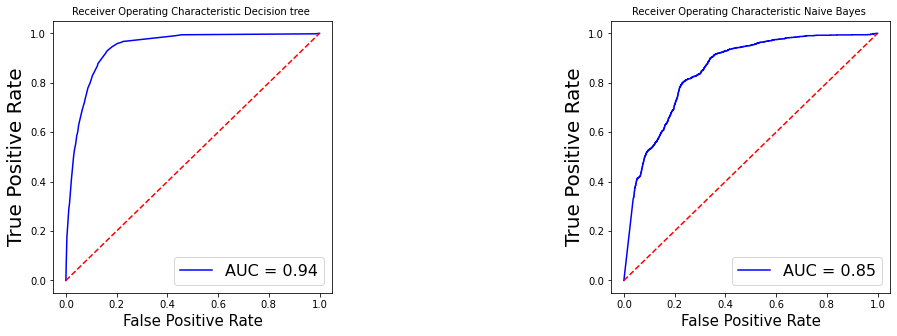

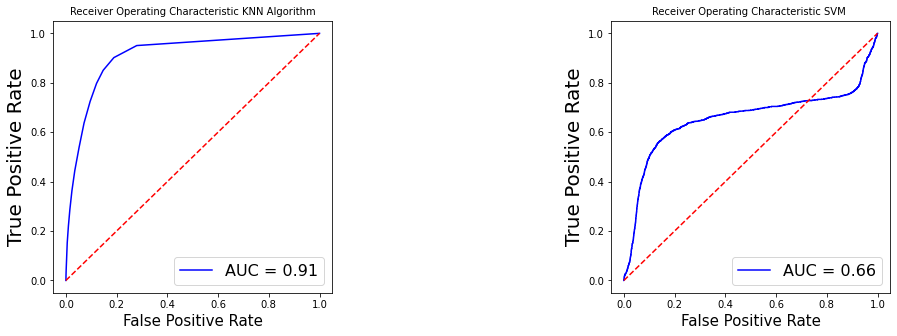

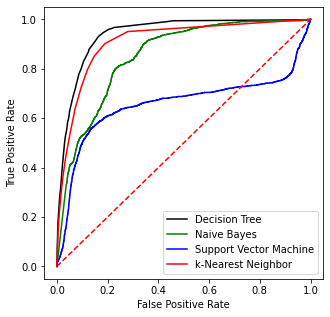

In [381]:
# Decision Tree ROC Curve plotting 
from sklearn import metrics

print("ROC curve for preprocessed data")

fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
probs = classifier.predict_proba(X_test_dt)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test_dt, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)
ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Decision tree ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)

# Naive Bayes ROC Curve Plotting
probs = gnb.predict_proba(X_test_nb)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test_nb, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)
ax1.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Receiver Operating Characteristic Naive Bayes ',fontsize=10)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)


# KNN algorithm ROC Curve plotting 
fig, (ax2, ax3) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
probs = knn_classifier.predict_proba(X_test_knn)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test_knn, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)
ax2.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax2.plot([0, 1], [0, 1],'r--')
ax2.set_title('Receiver Operating Characteristic KNN Algorithm',fontsize=10)
ax2.set_ylabel('True Positive Rate',fontsize=20)
ax2.set_xlabel('False Positive Rate',fontsize=15)
ax2.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)


# SVM Roc curve plotting
probs = svc.predict_proba(X_test_svc)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test_svc, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)
ax3.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax3.plot([0, 1], [0, 1],'r--')
ax3.set_title('Receiver Operating Characteristic SVM ',fontsize=10)
ax3.set_ylabel('True Positive Rate',fontsize=20)
ax3.set_xlabel('False Positive Rate',fontsize=15)
ax3.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)

# Try to plot all four model ROCs together 
from matplotlib import pyplot as plt
probs = classifier.predict_proba(X_test_dt)
dt_fpr, dt_tpr, threshold = metrics.roc_curve(y_test_dt, probs[:,1])
probsnb = gnb.predict_proba(X_test_nb)
nb_fpr, nb_tpr, threshold = metrics.roc_curve(y_test_nb, probsnb[:,1])
probknn = knn_classifier.predict_proba(X_test_knn)
knn_fpr, knn_tpr, threshold = metrics.roc_curve(y_test_knn, probknn[:,1])
probsvc = svc.predict_proba(X_test_svc)
svm_fpr, svm_tpr, threshold = metrics.roc_curve(y_test_svc, probsvc[:,1])

plt.figure(figsize=(5, 5))
plt.plot(dt_fpr, dt_tpr, linestyle='-', color='black', label="Decision Tree")
plt.plot(nb_fpr, nb_tpr, linestyle='-', color='green', label="Naive Bayes")
plt.plot(svm_fpr, svm_tpr, linestyle='-', color='blue', label="Support Vector Machine")
plt.plot(knn_fpr, knn_tpr, linestyle='-', color='red', label="k-Nearest Neighbor")

plt.plot([0, 1], [0, 1],"r--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [382]:
# Preprocessed data
# Comparison Model for all four algorithms - Test data 
print("Comparison model for preprocessed data:")
#Decision Tree
DT = round(classifier.score(X_test_dt, y_test_dt), 2) 
mae_dt = round(metrics.mean_absolute_error(y_test_dt, y_pred_dt), 4) 
mse_dt = round(metrics.mean_squared_error(y_test_dt, y_pred_dt), 4) 

#Naive Bayes
NB = round(gnb.score(X_test_nb, y_test_nb), 2) 
mae_nb = round(metrics.mean_absolute_error(y_test_nb, y_pred_nb), 4) 
mse_nb = round(metrics.mean_squared_error(y_test_nb, y_pred_nb), 4) 

# KNN   
KNN = round(knn_classifier.score(X_test_knn, y_test_knn), 2) 
mae_knn = metrics.mean_absolute_error(y_test_knn, y_pred_knn) 
mse_knn = metrics.mean_squared_error(y_test_knn, y_pred_knn) 

# SVM 
SVM = round(svc.score(X_test_svc, y_test_svc), 2) 
mae_svm = metrics.mean_absolute_error(y_test_svc, svcpred) 
mse_svm = metrics.mean_squared_error(y_test_svc, svcpred) 


compare_models = pd.DataFrame( 
    {  'Model' : ['DT', 'NB', 'KNN', 'SVM'], 
       'Score' : [DT, NB, KNN, SVM], 
        'MAE'  : [mae_dt, mae_nb, mae_knn, mae_svm], 
        'MSE'  : [mse_dt, mse_nb, mse_knn, mse_svm] 
    }) 
print("Test Data Comparison Model")
print(compare_models)


# Train Data 

#Decision Tree
DT = round(classifier.score(X_train_dt, y_train_dt), 2) 
mae_dt = round(metrics.mean_absolute_error(y_train_dt, y_pred_train_dt), 4) 
mse_dt = round(metrics.mean_squared_error(y_train_dt, y_pred_train_dt), 4) 

#Naive Bayes
NB = round(gnb.score(X_train_nb, y_train_nb), 2) 
mae_nb = round(metrics.mean_absolute_error(y_train_nb, y_pred_train_nb), 4) 
mse_nb = round(metrics.mean_squared_error(y_train_nb, y_pred_train_nb), 4) 

# KNN   
KNN = round(knn_classifier.score(X_train_knn, y_train_knn), 2) 
mae_knn = metrics.mean_absolute_error(y_train_knn, y_pred_train_knn) 
mse_knn = metrics.mean_squared_error(y_train_knn, y_pred_train_knn) 

# SVM 
SVM = round(svc.score(X_train_svc, y_train_svc), 2) 
mae_svm = metrics.mean_absolute_error(y_train_svc, svcpred_train) 
mse_svm = metrics.mean_squared_error(y_train_svc, svcpred_train) 

compare_models = pd.DataFrame( 
    {  'Model' : ['DT', 'NB', 'KNN', 'SVM'], 
       'Score' : [DT, NB, KNN, SVM], 
        'MAE'  : [mae_dt, mae_nb, mae_knn, mae_svm], 
        'MSE'  : [mse_dt, mse_nb, mse_knn, mse_svm] 
    }) 
print("Train Data Comparison Model")
print(compare_models)

Comparison model for preprocessed data:
Test Data Comparison Model
  Model  Score       MAE       MSE
0    DT   0.92  0.084800  0.084800
1    NB   0.86  0.138500  0.138500
2   KNN   0.90  0.095077  0.095077
3   SVM   0.87  0.132460  0.132460
Train Data Comparison Model
  Model  Score       MAE       MSE
0    DT   0.92  0.081500  0.081500
1    NB   0.87  0.134700  0.134700
2   KNN   0.91  0.087795  0.087795
3   SVM   0.87  0.131475  0.131475


In [383]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   lc_month_0                 41176 non-null  uint8  
 1   lc_month_1                 41176 non-null  uint8  
 2   lc_month_2                 41176 non-null  uint8  
 3   lc_month_3                 41176 non-null  uint8  
 4   lc_month_4                 41176 non-null  uint8  
 5   lc_month_5                 41176 non-null  uint8  
 6   lc_month_6                 41176 non-null  uint8  
 7   lc_month_7                 41176 non-null  uint8  
 8   lc_month_8                 41176 non-null  uint8  
 9   lc_month_9                 41176 non-null  uint8  
 10  poutcome_0                 41176 non-null  uint8  
 11  poutcome_1                 41176 non-null  uint8  
 12  poutcome_2                 41176 non-null  uint8  
 13  education_updated_0        41176 non-null  uin

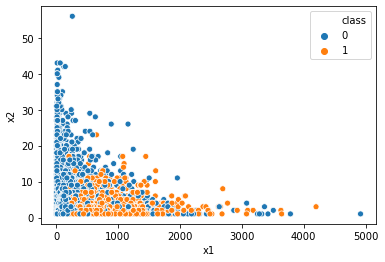

In [190]:

X = df_preprocessed.iloc[:, [17, 18]].values
y = df_preprocessed.iloc[:, 30].values

X_df = pd.DataFrame(X, columns=['x1','x2'])

y_df = pd.DataFrame(y, columns=["class"])
frames = [X_df, y_df]
data = pd.concat(frames, axis=1)

sns.scatterplot(x="x1", y="x2", hue='class', data=data)

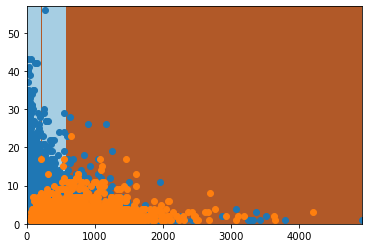

In [211]:
# Try to plot decision boundary for decision tree
import matplotlib
import matplotlib.pyplot as plt
# define bounds of the domain
min1, max1 = X[:, [0]].min()-1, X[:, [0]].max()+1
min2, max2 = X[:, [1]].min()-1, X[:, [1]].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
yhat = classifier.predict(grid)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')

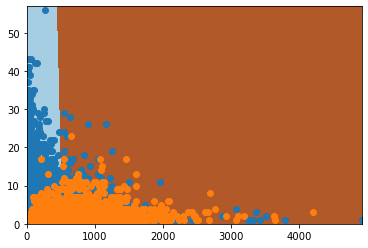

In [209]:
# Single line decision boundary
# Try to plot decision boundary for Naive Bayesian 
import matplotlib
import matplotlib.pyplot as plt
# define bounds of the domain
min1, max1 = X[:, [0]].min()-1, X[:, [0]].max()+1
min2, max2 = X[:, [1]].min()-1, X[:, [1]].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
yhat = gnb.predict(grid)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')

In [ ]:
# Since we had seen an imbalance in data we will also upsample the processed data and check for all models

In [68]:
# Upsample minority class
df_majority = df_preprocessed[df_preprocessed.client_subscribed_updated==0]
df_minority = df_preprocessed[df_preprocessed.client_subscribed_updated==1]

from sklearn.utils import resample

df_minority_upsampled = resample(df_minority, replace=True, n_samples=36537, random_state=123)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

df_upsampled.client_subscribed_updated.value_counts()

1    36537
0    36537
Name: client_subscribed_updated, dtype: int64

In [155]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73074 entries, 0 to 36369
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   lc_month_0                 73074 non-null  uint8  
 1   lc_month_1                 73074 non-null  uint8  
 2   lc_month_2                 73074 non-null  uint8  
 3   lc_month_3                 73074 non-null  uint8  
 4   lc_month_4                 73074 non-null  uint8  
 5   lc_month_5                 73074 non-null  uint8  
 6   lc_month_6                 73074 non-null  uint8  
 7   lc_month_7                 73074 non-null  uint8  
 8   lc_month_8                 73074 non-null  uint8  
 9   lc_month_9                 73074 non-null  uint8  
 10  poutcome_0                 73074 non-null  uint8  
 11  poutcome_1                 73074 non-null  uint8  
 12  poutcome_2                 73074 non-null  uint8  
 13  education_updated_0        73074 non-null  uin

In [216]:
X = df_upsampled.iloc[:, :29].values
y = df_upsampled.iloc[:, 30].values

In [217]:
category_columns_s = df_upsampled.select_dtypes(include='object').columns
numerical_columns_s= df_upsampled.select_dtypes(exclude='object').columns

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 550)

In [229]:
# Decision Tree
X_train_dt_s = X_train
X_test_dt_s = X_test 
y_train_dt_s = y_train 
y_test_dt_s = y_test

print("Decision Tree implementation:")
print()
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_dt_s = sc.fit_transform(X_train_dt_s)
X_test_dt_s = sc.transform(X_test_dt_s)

# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_s=DecisionTreeClassifier(criterion='entropy', random_state=550, max_depth=3)
classifier_s.fit(X_train_dt_s,y_train_dt_s)
# Predicting the Test set results
y_pred_dt_s = classifier_s.predict(X_test_dt_s)

# Predicting the train set results 
y_pred_train_dt_s = classifier_s.predict(X_train_dt_s)

print(accuracy_score(y_test_dt_s, y_pred_dt_s))

Decision Tree implementation:

0.8430022807381298


In [230]:

from sklearn import tree
text_representation = tree.export_text(classifier_s)
print(text_representation)


|--- feature_17 <= -0.50
|   |--- feature_22 <= 0.14
|   |   |--- feature_6 <= 0.52
|   |   |   |--- class: 1
|   |   |--- feature_6 >  0.52
|   |   |   |--- class: 0
|   |--- feature_22 >  0.14
|   |   |--- feature_8 <= 2.40
|   |   |   |--- class: 0
|   |   |--- feature_8 >  2.40
|   |   |   |--- class: 1
|--- feature_17 >  -0.50
|   |--- feature_23 <= -0.56
|   |   |--- feature_12 <= 1.30
|   |   |   |--- class: 1
|   |   |--- feature_12 >  1.30
|   |   |   |--- class: 1
|   |--- feature_23 >  -0.56
|   |   |--- feature_17 <= 0.23
|   |   |   |--- class: 0
|   |   |--- feature_17 >  0.23
|   |   |   |--- class: 1



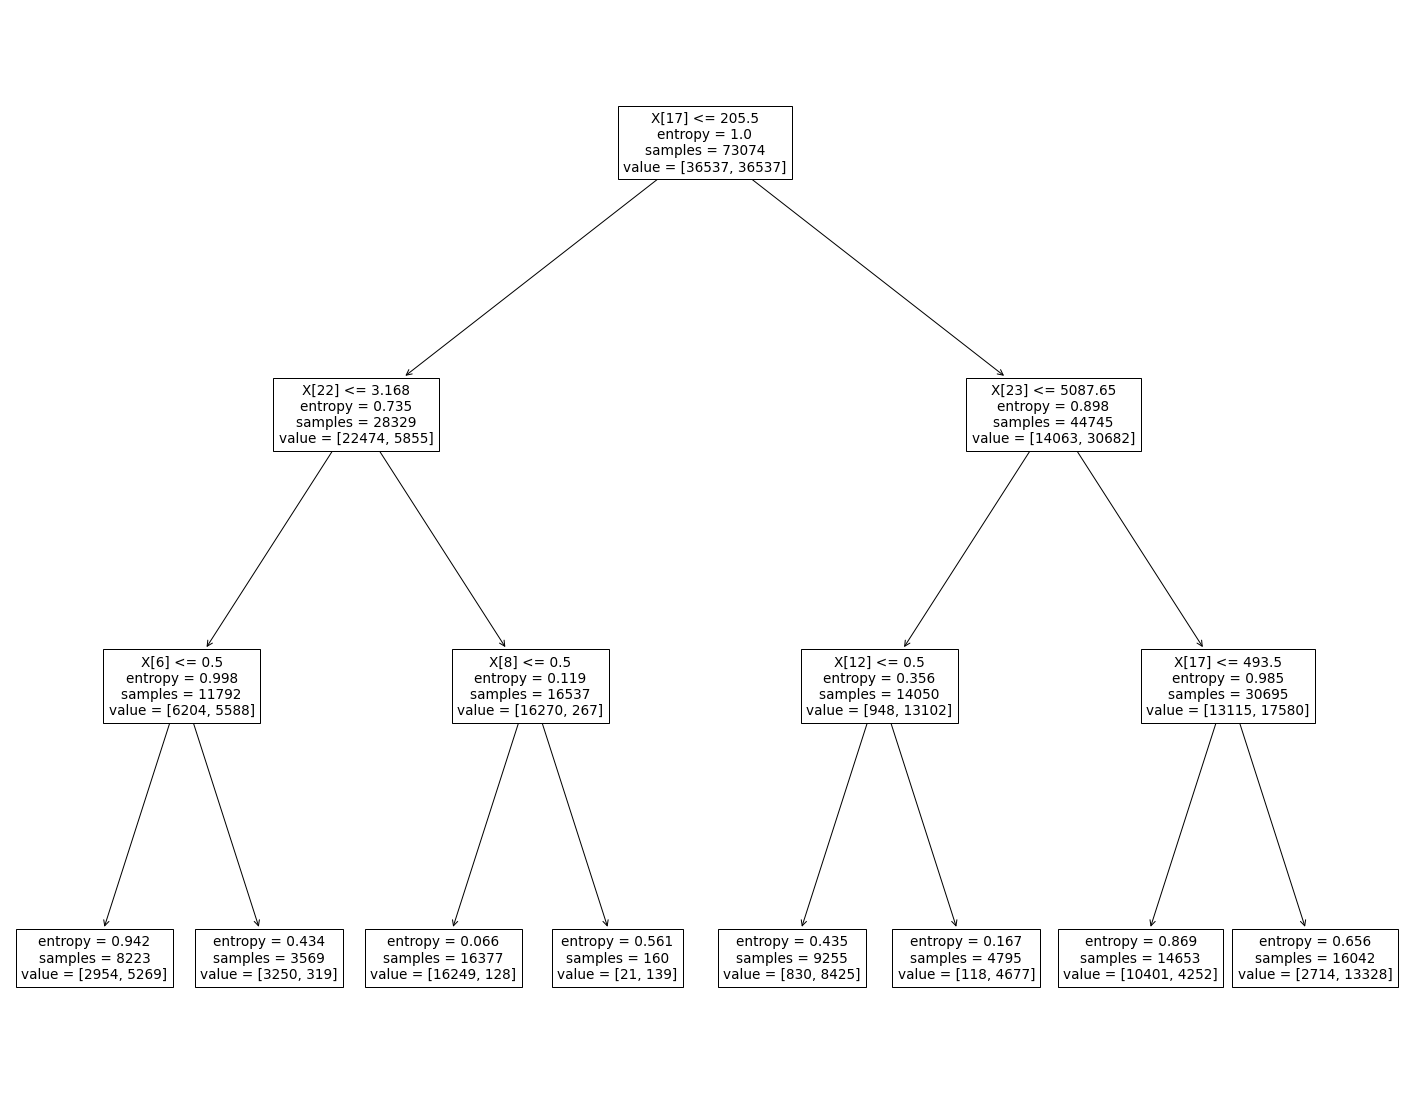

In [231]:
classifier_s = classifier_s.fit(X,y)
fig = plt.figure(figsize=(25,20))
plt.show(tree.plot_tree(classifier_s))

In [74]:
# Naive Bayes Learner 
X_train_nb_s = X_train
X_test_nb_s = X_test 
y_train_nb_s = y_train 
y_test_nb_s = y_test

print("Naive Bayes Learner: Gaussian")
print()
from sklearn.naive_bayes import GaussianNB


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_nb_s = sc.fit_transform(X_train_nb_s)
X_test_nb_s = sc.transform(X_test_nb_s)


# instantiate the model
gnb_s = GaussianNB()
# fit the model
gnb_s.fit(X_train_nb_s, y_train_nb_s)
# Predict the Test result set 
y_pred_nb_s = gnb_s.predict(X_test_nb_s)
# Predict the Train Result Set
y_pred_train_nb_s = gnb_s.predict(X_train_nb_s)



Naive Bayes Learner: Gaussian



In [75]:
# KNN algorithm 

X_train_knn_s = X_train
X_test_knn_s = X_test 
y_train_knn_s = y_train 
y_test_knn_s = y_test

print("KNN Algorithm")
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_knn_s)
X_train_knn_s = scaler.transform(X_train_knn_s)
X_test_knn_s = scaler.transform(X_test_knn_s)

# Fit the model
from sklearn.neighbors import KNeighborsClassifier
knn_classifier_s = KNeighborsClassifier(n_neighbors = 17)
knn_classifier_s.fit(X_train_knn_s, y_train_knn_s)

y_pred_knn_s = knn_classifier_s.predict(X_test_knn_s)
y_pred_train_knn_s = knn_classifier_s.predict(X_train_knn_s)


KNN Algorithm


In [76]:
X_train_svc_s = X_train
X_test_svc_s = X_test 
y_train_svc_s = y_train 
y_test_svc_s = y_test

print("SVM Tree implementation:")
print()
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_svc_s = sc.fit_transform(X_train_svc_s)
X_test_svc_s = sc.transform(X_test_svc_s)

from sklearn.svm import SVC
svc_s= SVC(kernel = 'sigmoid', probability=True)
svc_s = svc_s.fit(X_train_svc_s, y_train_svc_s)
svcpred_s = svc_s.predict(X_test_svc_s)
svcpred_train_s = svc_s.predict(X_train_svc_s)


SVM Tree implementation:



In [140]:
print("######################################################################################################")
from sklearn.metrics import accuracy_score

print('Decision Tree Training set accuracy score: {:.4f}'.format(accuracy_score(y_train_dt_s, y_pred_train_dt_s)))
print('Decision Tree Test set accuracy score: {:.4f}'.format(accuracy_score(y_test_dt_s, y_pred_dt_s)))
print('Naive Bayes Training set accuracy score: {:.4f}'.format(accuracy_score(y_train_nb_s, y_pred_train_nb_s)))
print('Naive Bayes Test set accuracy score: {:.4f}'.format(accuracy_score(y_test_nb_s, y_pred_nb_s)))
print("KNN Accuracy for train Data:",accuracy_score(y_train_knn_s,y_pred_train_knn_s))
print("KNN Accuracy for test Data:",accuracy_score(y_test_knn_s,y_pred_knn_s))
print("SVM Accuracy for test Data:",accuracy_score(y_test_svc_s,svcpred_s))
print("SVM Accuracy for train Data:",accuracy_score(y_train_svc_s,svcpred_train_s))

print("######################################################################################################")

# Find the confusion matrix:
from sklearn.metrics import confusion_matrix
print()
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test_dt_s, y_pred_dt_s))

print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test_nb_s, y_pred_nb_s))

print("KNN Confusion Matrix:")
print(confusion_matrix(y_test_knn_s, y_pred_knn_s))

print("SVM Confusion Matrix")
print(confusion_matrix(y_test_svc_s, svcpred_s)) 
print("######################################################################################################")


from sklearn.metrics import classification_report
print()
print("Decision Tree Classification Report:")
print(classification_report(y_test_dt_s, y_pred_dt_s))

print()
print("Naive Bayes Classification Report:")
print(classification_report(y_test_nb_s, y_pred_nb_s))

print()
print("KNN Classification Report:",)
print (classification_report(y_test_knn_s, y_pred_knn_s))

print()
print("SVM Classification Report:",)
print (classification_report(y_test_svc_s, svcpred_s))
print("######################################################################################################")


######################################################################################################
Decision Tree Training set accuracy score: 0.8829
Decision Tree Test set accuracy score: 0.8792
Naive Bayes Training set accuracy score: 0.7298
Naive Bayes Test set accuracy score: 0.7239
KNN Accuracy for train Data: 0.8904389387038134
KNN Accuracy for test Data: 0.8779597760729836
SVM Accuracy for test Data: 0.7827907941115488
SVM Accuracy for train Data: 0.7838599644600585
######################################################################################################

Decision Tree Confusion Matrix:
[[ 9618  2359]
 [  553 11585]]
Naive Bayes Confusion Matrix:
[[10211  1766]
 [ 4892  7246]]
KNN Confusion Matrix:
[[ 9956  2021]
 [  922 11216]]
SVM Confusion Matrix
[[9373 2604]
 [2634 9504]]
######################################################################################################

Decision Tree Classification Report:
              precision    recall  f1-score   sup

ROC curve on upsampled data


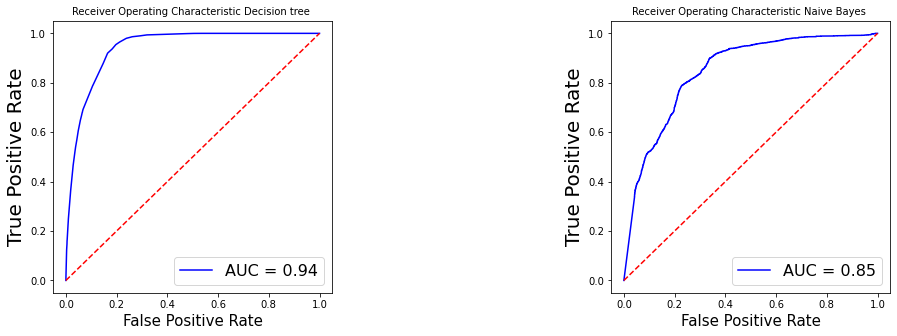

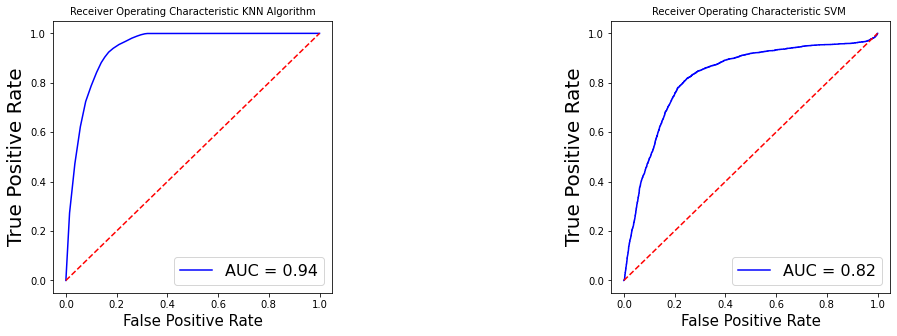

In [132]:
print("ROC curve on upsampled data")
# Decision Tree ROC Curve plotting 
from sklearn import metrics
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
probs = classifier_s.predict_proba(X_test_dt_s)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test_dt_s, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)
ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Decision tree ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)

# Naive Bayes ROC Curve Plotting

probs = gnb_s.predict_proba(X_test_nb_s)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test_nb_s, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)
ax1.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Receiver Operating Characteristic Naive Bayes ',fontsize=10)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)


# KNN algorithm ROC Curve plotting 
fig, (ax2, ax3) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
probs = knn_classifier_s.predict_proba(X_test_knn_s)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test_knn_s, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)
ax2.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax2.plot([0, 1], [0, 1],'r--')
ax2.set_title('Receiver Operating Characteristic KNN Algorithm',fontsize=10)
ax2.set_ylabel('True Positive Rate',fontsize=20)
ax2.set_xlabel('False Positive Rate',fontsize=15)
ax2.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)


# SVM Roc curve plotting

probs = svc_s.predict_proba(X_test_svc_s)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test_svc_s, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)
ax3.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax3.plot([0, 1], [0, 1],'r--')
ax3.set_title('Receiver Operating Characteristic SVM ',fontsize=10)
ax3.set_ylabel('True Positive Rate',fontsize=20)
ax3.set_xlabel('False Positive Rate',fontsize=15)
ax3.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)

In [ ]:
""" Short summary to discuss the results and lessons learned 
Without Upsampiling:

Finding the best algorithm for the model depends on various factors: 
1. Should be good fit
The below appendix can be used to identify a good fit model.
    a. Underfitting – test and training error high
    b. Overfitting – test error is high, training error low
    c. Good fit – test error low, slightly higher than the training error
    d. Unknown fit - test error low, training 
    error 'high'
2. AUC score 

Raw Data: 
Initially, model was trained with raw dataset input i.e. without any preprocessing to understand what level of preprocessing is 
required to obtain a good fit model. Below results were obtained using this methodology:
Test Data Comparison Model
  Model  Score       MAE       MSE
0    DT   0.91  0.094000  0.094000
1    NB   0.72  0.283200  0.283200
2   KNN   0.90  0.103172  0.103172
3   SVM   0.87  0.127014  0.127014
Train Data Comparison Model
  Model  Score       MAE       MSE
0    DT   0.91  0.089600  0.089600
1    NB   0.71  0.287600  0.287600
2   KNN   0.92  0.075289  0.075289
3   SVM   0.88  0.123718  0.123718

Confusion Matrix on Raw dataset:
Decision Tree Confusion Matrix:
[[11543   471]
 [  734   841]]
Naive Bayes Confusion Matrix:
[[8461 3553]
 [ 242 1333]]
KNN Confusion Matrix:
[[11773   241]
 [ 1132   443]]
SVM Confusion Matrix
[[11221   793]
 [  916   659]]
 
As seen in the above comparison table, Decision tree and KNN has the highest score; but in terms of error, the train data error 
is acceptably less than test data error for decision tree. So Decision tree would be a good choice for our model. On the other 
hand, the score for Naive Bayes is very less accurate to use for training our model.

Using Preprocessed Data: The results obtained using this methodology: 
Test Data Comparison Model
  Model  Score       MAE       MSE
0    DT   0.90  0.097900  0.097900
1    NB   0.87  0.130000  0.130000
2   KNN   0.90  0.104423  0.104423
3   SVM   0.87  0.129958  0.129958
Train Data Comparison Model
  Model  Score       MAE       MSE
0    DT   0.95  0.053100  0.053100
1    NB   0.87  0.126400  0.126400
2   KNN   0.93  0.073477  0.073477
3   SVM   0.87  0.130859  0.130859

Confusion Matrix for Preprocessed data:
Decision Tree Confusion Matrix:
[[11599   411]
 [  741   838]]
Naive Bayes Confusion Matrix:
[[10879  1131]
 [  751   828]]
KNN Confusion Matrix:
[[11724   286]
 [ 1006   573]]
SVM Confusion Matrix
[[11141   869]
 [  931   648]]
As seen in the above comparison table, Decision tree and KNN has the highest score; but in terms of error, the train data error
is acceptably less than test data error for decision tree. So, in this case as well decision tree would be a good choice for 
our model. 

The above takeaways are supported by looking at the ROC Curve for all the models:
AUC_dt = 0.91 
AUC_nb = 0.86
AUC_knn= 0.86
AUC_svm= 0.67

Higher the AUC, better is the choice of the model. Hence, decision tree would be the best choice for our model.

With Upsamping: 
Test Data Comparison Model
  Model  Score       MAE       MSE
0    DT   0.91  0.088100  0.088100
1    NB   0.74  0.256600  0.256600
2   KNN   0.91  0.091188  0.091188
3   SVM   0.78  0.215882  0.215882
Train Data Comparison Model
  Model  Score       MAE       MSE
0    DT   0.93  0.069300  0.069300
1    NB   0.75  0.250000  0.250000
2   KNN   0.94  0.063237  0.063237
3   SVM   0.79  0.213934  0.213934

Confusion Matrix for Upsampled data: 
Decision Tree Confusion Matrix:
[[ 9618  2359]
 [  553 11585]]
Naive Bayes Confusion Matrix:
[[10211  1766]
 [ 4892  7246]]
KNN Confusion Matrix:
[[ 9956  2021]
 [  922 11216]]
SVM Confusion Matrix
[[9373 2604]
 [2634 9504]]
 
With Upsampling as well, Decision tree seems to be performing better than other algorithms. 
The accuracy of the train and test is nearly equal with less error difference.
Refer to the below classification report to see the improvements with upsampled data in model
######################################################################################################
Classification report for upsampled data: 
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     11977
           1       0.87      0.97      0.92     12138

    accuracy                           0.91     24115
   macro avg       0.92      0.91      0.91     24115
weighted avg       0.92      0.91      0.91     24115


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.88      0.77     11977
           1       0.83      0.61      0.71     12138

    accuracy                           0.74     24115
   macro avg       0.76      0.74      0.74     24115
weighted avg       0.76      0.74      0.74     24115


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     11977
           1       0.86      0.98      0.92     12138

    accuracy                           0.91     24115
   macro avg       0.92      0.91      0.91     24115
weighted avg       0.92      0.91      0.91     24115


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78     11977
           1       0.79      0.78      0.79     12138

    accuracy                           0.78     24115
   macro avg       0.78      0.78      0.78     24115
weighted avg       0.78      0.78      0.78     24115


*******************************************************************
Classification Report for preprocessed data: 
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     12010
           1       0.67      0.53      0.59      1579

    accuracy                           0.92     13589
   macro avg       0.81      0.75      0.77     13589
weighted avg       0.91      0.92      0.91     13589


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92     12010
           1       0.42      0.52      0.47      1579

    accuracy                           0.86     13589
   macro avg       0.68      0.72      0.69     13589
weighted avg       0.88      0.86      0.87     13589


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12010
           1       0.67      0.36      0.47      1579

    accuracy                           0.90     13589
   macro avg       0.79      0.67      0.71     13589
weighted avg       0.89      0.90      0.89     13589


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     12010
           1       0.43      0.41      0.42      1579

    accuracy                           0.87     13589
   macro avg       0.68      0.67      0.67     13589
weighted avg       0.87      0.87      0.87     13589
######################################################################################################
As seen, with upsampling we have improved the recall for the minority class as well.
Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, 
and they tend to ignore the minority class. They tend only to predict the majority class, hence, 
having major misclassification of the minority class in comparison with the majority class. 
In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone 
to the case when minority class has negligible or very lesser recall. Hence we have used upsampling, which clearly with data
proves that the Decision tree model with upsampled data is a better choice for our model.



Refer to the following accuracies with respect to the preprocessed data: 
#####################################################################################################
Decision Tree Training set accuracy score: 0.9307
Decision Tree Test set accuracy score: 0.9119
Naive Bayes Training set accuracy score: 0.7500
Naive Bayes Test set accuracy score: 0.7434
KNN Accuracy for train Data: 0.9367634142854225
KNN Accuracy for test Data: 0.908811942774207
SVM Accuracy for test Data: 0.7841177690234294
SVM Accuracy for train Data: 0.7860658918687065


Learnings:
1. Preprocessing helped Naive Bayes improve it's score with subsequently decrease it's error margin as well. 
2. Preprocessing is the most crucial step in Machine Learning, it is the deciding point wherein preprocessing can either 
make or break the model. 
3. Job - We replaced job titles with working or not working category; wherein retired, student, unemployed, unknown are 
categorised to not_working and remaining job_titles into the working category. 
4. Marital - We converted "single", "divorced", "unknown" (unknown to unmarried category because they are few 
in number and also married category has enough data) into a one category "unmarried" while remining ones into married.
5. Education - Here, we did the following grouping:
    a. professional.course, university.degree - higher_education
    b. basic.4y, basic.6y, basic.9y, high school - basic_education
    c. illiterate, unknown - no_education
6. housing_loan and personal_loan - Here if either of the loan is taken then mark as "YES" else if no or unknown for both then 
"NO". But, as seen from individual visualisations with the output variable between personal loan and client_subscription then 
there is a possibility that we might lose some information on combining housing loan and personal loan, hence keep two different 
columns. 
7. lc_day_of_week - Here, analysis can be done using the "lc_month" column that which month has highest subscription so 
lc_day_of_week can be dropped off for now to understand the basic analysis.
8. Accuracy didn't improve much even after processing the data. But there was a significant increase in precision after sampling 
of data, which was expected as the the numbers were quite imbalanced. 
"""

In [ ]:
# Question 2: Multi-class Learning

In [ ]:
# a. Use a decision tree algorithm to construct a model against 

In [237]:
df_multiclass_copy=df_cleaned.copy()

In [238]:
category_columns = df_multiclass_copy.select_dtypes(include='object').columns
numerical_columns= df_multiclass_copy.select_dtypes(exclude='object').columns

In [239]:
# 0: not_working; 1: working
def convert_target_variable(row, column_name):
    if row[column_name] == 'nonexistent':
        return 0
    elif row[column_name] == 'success':
        return 1
    else: return 2

df_multiclass_copy['poutcome_updated'] = df_multiclass_copy.apply(lambda row: convert_target_variable(row, 'poutcome'),axis=1)

print(df_multiclass_copy['poutcome_updated'].unique())

[0 2 1]


In [240]:
df_multiclass_copy = df_multiclass_copy.drop(['poutcome'], axis = 1) 

In [241]:
# label_encoder object knows how to understand word labels. 
from sklearn.preprocessing import LabelEncoder

category_columns = df_multiclass_copy.select_dtypes(include='object').columns
numerical_columns= df_multiclass_copy.select_dtypes(exclude='object').columns

df_mc_cleaned_num = df_multiclass_copy[category_columns].apply(LabelEncoder().fit_transform)
df_mc_cleaned_num

,lc_month,education_updated
0,6,0
1,6,2
2,6,2
3,6,0
4,6,2
...,...,...
41183,7,1
41184,7,1
41185,7,1
41186,7,1


In [242]:
df_mc_preprocessed = pd.concat([df_mc_cleaned_num,df_multiclass_copy[numerical_columns], df_cleaned['poutcome']], axis = 1)

In [243]:
df_mc_preprocessed = df_mc_preprocessed.drop(['poutcome_updated'], axis = 1) 

In [244]:
df_mc_preprocessed

,lc_month,education_updated,age,lc_duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_updated,marital_updated,personal_loan_updated,contact_type_updated,contacted_previously,has_credit_updated,client_subscribed_updated,poutcome
0,6,0,56,261,1,1.1,93.994,-36.4,4.857,5191.0,1,1,0,0,0,0,0,nonexistent
1,6,2,57,149,1,1.1,93.994,-36.4,4.857,5191.0,1,1,0,0,0,0,0,nonexistent
2,6,2,37,226,1,1.1,93.994,-36.4,4.857,5191.0,1,1,0,0,0,0,0,nonexistent
3,6,0,40,151,1,1.1,93.994,-36.4,4.857,5191.0,1,1,0,0,0,0,0,nonexistent
4,6,2,56,307,1,1.1,93.994,-36.4,4.857,5191.0,1,1,1,0,0,0,0,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,7,1,73,334,1,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,1,0,0,1,nonexistent
41184,7,1,46,383,1,-1.1,94.767,-50.8,1.028,4963.6,1,1,0,1,0,0,0,nonexistent
41185,7,1,56,189,2,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,1,0,0,0,nonexistent
41186,7,1,44,442,1,-1.1,94.767,-50.8,1.028,4963.6,1,1,0,1,0,0,1,nonexistent


In [290]:
X = df_mc_preprocessed.iloc[:,0:16].values
y = df_mc_preprocessed.iloc[:,17].values

In [291]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify=y, random_state = 42)

In [248]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [249]:
# Decision Tree for multiclass classification
y_pred =classifier.predict(X_test)

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred, target_names=['0','1','2']))

Accuracy: 0.97
Confusion Matrix: 
 [[ 1139     0   264]
 [    0 11733     0]
 [  142     0   311]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1403
           1       1.00      1.00      1.00     11733
           2       0.54      0.69      0.61       453

    accuracy                           0.97     13589
   macro avg       0.81      0.83      0.82     13589
weighted avg       0.97      0.97      0.97     13589



In [283]:
# OneVsOneScheme on preprocessed data - ROC Curves using onevsone comparison, AUC calculation with both macro and prevalence weighted average
"""
Here there are two approaches we can use:
1. Use onevsoneclassifier of sklearn, then find the individual labels created with it using "estimator_" attribute and 
then find 
the ROC curves of each individual learners
reference: https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html and 
https://github.com/scikit-learn/scikit-learn/blob/0fb307bf3/sklearn/multiclass.py#L632

2. Use onevsoneclassifier of sklearn, then find the individual labels by slicing the target variable and prediction variable, 
then plot the ROC curves and calculate AUC for the same. 

Ideally, both should produce same ROC curve

Also, since the data is heavily imbalanced we will try to downsample the data and perform activity no 2 on the downsampled data
to check for improvements. 
"""

In [292]:
# OneVsOneScheme on preprocessed data 

from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#clf = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, y_train)

classifier = OneVsOneClassifier(SVC(kernel='linear', probability=True))
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test[:, 0:16])

In [294]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred, target_names=['0','1','2']))

Accuracy: 0.97
Confusion Matrix: 
 [[ 1221     0   182]
 [    0 11733     0]
 [  230     0   223]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1403
           1       1.00      1.00      1.00     11733
           2       0.55      0.49      0.52       453

    accuracy                           0.97     13589
   macro avg       0.80      0.79      0.79     13589
weighted avg       0.97      0.97      0.97     13589



In [252]:
# AUC calculation using Macro and weighted average 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score

def multiclass_roc_auc_score(y_test, y_pred,multi_class="ovo", average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred,multi_class="ovo", average=average)

print()
print('AUC using macro average: {:.4f}'.format(multiclass_roc_auc_score(y_test, y_pred,multi_class="ovo", average="macro")))

def multiclass_roc_auc_score(y_test, y_pred,multi_class="ovo", average="weighted"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, multi_class="ovo",average=average)

print('AUC using weighted average: {:.4f}'.format(multiclass_roc_auc_score(y_test, y_pred,multi_class="ovo", average="weighted")))



AUC using macro average: 0.8883
AUC using weighted average: 0.9836


In [254]:
# We will now start with using attributes of onevsoneclassifier of sklearn 

In [255]:
df_cleaned

,age,lc_month,lc_duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_updated,marital_updated,education_updated,personal_loan_updated,contact_type_updated,contacted_previously,has_credit_updated,client_subscribed_updated
0,56,may,261,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1,1,basic_education,0,0,0,0,0
1,57,may,149,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1,1,no_education,0,0,0,0,0
2,37,may,226,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1,1,no_education,0,0,0,0,0
3,40,may,151,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1,1,basic_education,0,0,0,0,0
4,56,may,307,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1,1,no_education,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,nov,334,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,1,higher_education,0,1,0,0,1
41184,46,nov,383,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,1,higher_education,0,1,0,0,0
41185,56,nov,189,2,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,1,higher_education,0,1,0,0,0
41186,44,nov,442,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,1,higher_education,0,1,0,0,1


In [256]:
# Finding the correlation between the features and the target variable
def convert_yn_to_01(row, column_name):
    if row[column_name] == 'nonexistent':
        return 0
    elif row[column_name] == 'success':
        return 1
    else: return 2

df_obj = df_mc_preprocessed.copy()
df_obj

df_obj['poutcome_updated'] = df_mc_preprocessed.apply(lambda row: convert_yn_to_01(row, 'poutcome'),axis=1)

df_obj = df_obj.drop(columns = 'poutcome')
print(df_obj['poutcome_updated'].value_counts())
df_obj

0    35551
2     4252
1     1373
Name: poutcome_updated, dtype: int64


,lc_month,education_updated,age,lc_duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_updated,marital_updated,personal_loan_updated,contact_type_updated,contacted_previously,has_credit_updated,client_subscribed_updated,poutcome_updated
0,6,0,56,261,1,1.1,93.994,-36.4,4.857,5191.0,1,1,0,0,0,0,0,0
1,6,2,57,149,1,1.1,93.994,-36.4,4.857,5191.0,1,1,0,0,0,0,0,0
2,6,2,37,226,1,1.1,93.994,-36.4,4.857,5191.0,1,1,0,0,0,0,0,0
3,6,0,40,151,1,1.1,93.994,-36.4,4.857,5191.0,1,1,0,0,0,0,0,0
4,6,2,56,307,1,1.1,93.994,-36.4,4.857,5191.0,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,7,1,73,334,1,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,1,0,0,1,0
41184,7,1,46,383,1,-1.1,94.767,-50.8,1.028,4963.6,1,1,0,1,0,0,0,0
41185,7,1,56,189,2,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,1,0,0,0,0
41186,7,1,44,442,1,-1.1,94.767,-50.8,1.028,4963.6,1,1,0,1,0,0,1,0


In [257]:
X = df_obj.iloc[:,0:16].values
y = df_obj.iloc[:,17].values

In [258]:
df_obj.head()

,lc_month,education_updated,age,lc_duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_updated,marital_updated,personal_loan_updated,contact_type_updated,contacted_previously,has_credit_updated,client_subscribed_updated,poutcome_updated
0,6,0,56,261,1,1.1,93.994,-36.4,4.857,5191.0,1,1,0,0,0,0,0,0
1,6,2,57,149,1,1.1,93.994,-36.4,4.857,5191.0,1,1,0,0,0,0,0,0
2,6,2,37,226,1,1.1,93.994,-36.4,4.857,5191.0,1,1,0,0,0,0,0,0
3,6,0,40,151,1,1.1,93.994,-36.4,4.857,5191.0,1,1,0,0,0,0,0,0
4,6,2,56,307,1,1.1,93.994,-36.4,4.857,5191.0,1,1,1,0,0,0,0,0


In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [260]:
y_test

array([0, 0, 0, ..., 1, 0, 2], dtype=int64)

In [261]:
from sklearn.multiclass import OneVsOneClassifier
classifier_mc = OneVsOneClassifier(DecisionTreeClassifier(random_state=0)).fit(X_train, y_train)
y_pred = classifier_mc.predict(X_test[:, 0:16])
comp=[(0,1),(0,2),(1,2)]  # Static way of naming classes, the order of first class of one label is positive class 
# and second is negative class; reference is _fit_ovo_binary function of multiclass.py in sklearn

Macro average for (0, 1) 1.0
Weighted average for (0, 1) 1.0
Macro average for (0, 2) 1.0
Weighted average for (0, 2) 1.0
Macro average for (1, 2) 0.6221982417234279
Weighted average for (1, 2) 0.6221982417234279


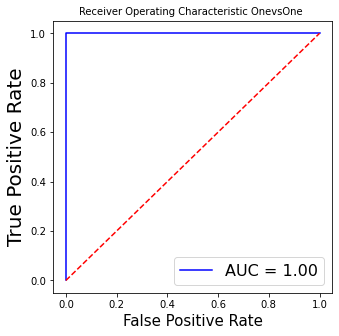

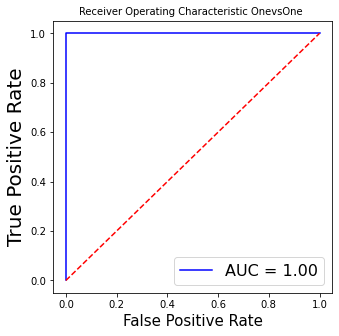

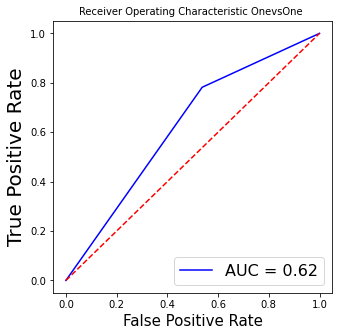

In [262]:
# Here onevsone classifier has already done the voting withing the onevsoneclassifier. To retrieve individual one vs one class labels,
# we will use the attribute of OneVsOneclassifier i.e estimators_ to find individual class labels and it's prediction

from sklearn.preprocessing import LabelBinarizer

y_pred_e = []
for i,e in enumerate(classifier_mc.estimators_):
    y_pred_e=classifier_mc.predict(X_test[((y_test==comp[i][0]) | (y_test==comp[i][1])), 0:16])
    y_test_e=y_test[((y_test==comp[i][0]) | (y_test==comp[i][1])),]
    y_test_e[y_test_e == comp[i][0]] = 0
    y_test_e[y_test_e == comp[i][1]] = 1
    fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5))
    fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test_e, y_pred_e)
    roc_aucxgb = metrics.auc(fprxgb, tprxgb)
    ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
    ax.plot([0, 1], [0, 1],'r--')
    ax.set_title('Receiver Operating Characteristic OnevsOne ',fontsize=10)
    ax.set_ylabel('True Positive Rate',fontsize=20)
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.legend(loc = 'lower right', prop={'size': 16})
    plt.subplots_adjust(wspace=1)
    print("Macro average for", comp[i], roc_auc_score(y_test_e, y_pred_e, average="macro"))
    print("Weighted average for", comp[i], roc_auc_score(y_test_e, y_pred_e, average="weighted"))

In [263]:
print(classification_report(y_test, y_pred, target_names=['0','1','2']))
cm=confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11745
           1       0.39      0.46      0.42       428
           2       0.83      0.78      0.80      1416

    accuracy                           0.96     13589
   macro avg       0.74      0.75      0.74     13589
weighted avg       0.96      0.96      0.96     13589

[[11745     0     0]
 [    0   198   230]
 [    0   309  1107]]


In [264]:
df_obj['poutcome_updated'].value_counts()

0    35551
2     4252
1     1373
Name: poutcome_updated, dtype: int64

In [267]:
X = df_obj.iloc[:,0:16].values
y = df_obj.iloc[:,17].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
from sklearn.multiclass import OneVsOneClassifier
classifier_mc = OneVsOneClassifier(DecisionTreeClassifier(random_state=0)).fit(X_train, y_train)
y_pred = classifier_mc.predict(X_test[:, 0:16])
comp=[(0,1),(0,2),(1,2)]

0 1
0 2
1 2


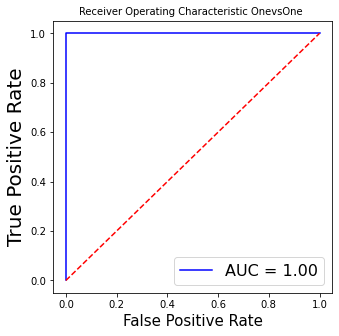

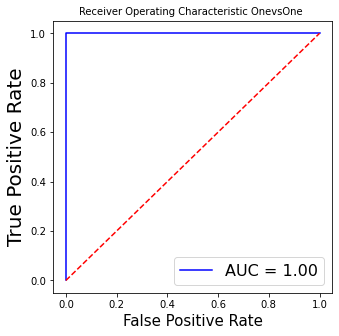

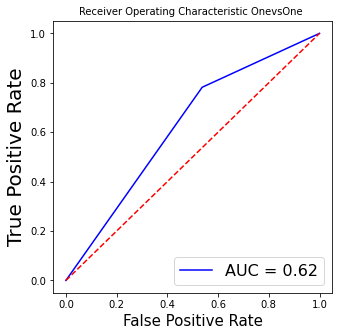

In [268]:
# Here onevsone classifier has already done the voting to retrieve individual class labels that was used, we will use the 
# attribute of OneVsOneclassifier i.e estimators_ to find individual class labels and it's prediction

y_pred_e = []
for i,e in enumerate(classifier_mc.estimators_):
    y_pred_e=classifier_mc.predict(X_test[((y_test==comp[i][0]) | (y_test==comp[i][1])), 0:16])
    y_test_e=y_test[((y_test==comp[i][0]) | (y_test==comp[i][1])),]
    print(comp[i][0], comp[i][1])
    y_test_e[y_test_e == comp[i][0]] = 0
    y_test_e[y_test_e == comp[i][1]] = 1
    fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5))
    fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test_e, y_pred_e)
    roc_aucxgb = metrics.auc(fprxgb, tprxgb)
    ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
    ax.plot([0, 1], [0, 1],'r--')
    ax.set_title('Receiver Operating Characteristic OnevsOne ',fontsize=10)
    ax.set_ylabel('True Positive Rate',fontsize=20)
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.legend(loc = 'lower right', prop={'size': 16})
    plt.subplots_adjust(wspace=1)

In [269]:
print(classification_report(y_test, y_pred, target_names=['0','1','2']))


cm=confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11745
           1       0.39      0.46      0.42       428
           2       0.83      0.78      0.80      1416

    accuracy                           0.96     13589
   macro avg       0.74      0.75      0.74     13589
weighted avg       0.96      0.96      0.96     13589

[[11745     0     0]
 [    0   198   230]
 [    0   309  1107]]


In [ ]:
# We will sample the final output and identify the labels based on the binarised output variable 

In [270]:
from sklearn.preprocessing import label_binarize

y_pred = label_binarize(y_pred, classes=[0, 1, 2])
n_classes = y_pred.shape[1]
n_classes

y_test = label_binarize(y_test, classes=[0, 1, 2])

In [273]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Here we will sample the test and predicted target variable and retrieve individual labels values of onevsone scheme 

fpr = dict()
tpr = dict()
comp=[(0,1),(0,2),(1,2)]
k=0
roc_auc = dict() 
for t in comp:
    i=t[0]
    j=t[1]
    y_test_temp=y_test[((y_test[:,i]==1) | (y_test[:,j]==1)),] 
    y_pred_temp=y_pred[((y_test[:,i]==1) | (y_test[:,j]==1)),] 
    #print("y_test_temp[:,i]",y_test_temp)
    #print("y_pred_temp[:,i]", y_pred_temp)
    fpr[k], tpr[k], _ = roc_curve(y_test_temp[:,i], y_pred_temp[:,i]) 
    cm=confusion_matrix(y_test_temp[:,i], y_pred_temp[:,i])
    print(cm)
    #print(i,j)
    roc_auc[k] = auc(fpr[k], tpr[k])
    k=k+1


# Compute macro-average ROC curve and ROC area
#fpr["macro"], tpr["macro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

[[  428     0]
 [    0 11745]]
[[ 1416     0]
 [    0 11745]]
[[1107  309]
 [ 230  198]]


<ipython-input-274-2a409c5dbea1>:10: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


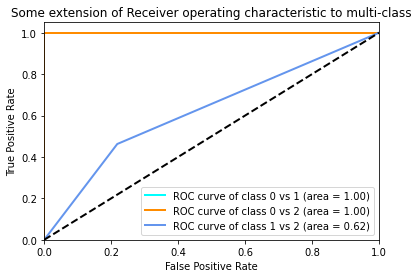

In [274]:
from scipy import interp
from itertools import cycle
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} vs {1} (area = {2:0.2f})'
             ''.format(comp[i][0], comp[i][1], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# We can see that learners 1 and 2 have voted max for class 0, i.e. learners 1 and 2 clearly classify between 0 and other class.

In [ ]:
# Let's try the same onevsone learner technique on downsampled data as there is huge imbalance in data

In [275]:
# Try undersampling the majority class 
df_majority = df_obj[df_obj.poutcome_updated==0]
df_minority1 = df_obj[df_obj.poutcome_updated==1]
df_minority2 = df_obj[df_obj.poutcome_updated==2]

from sklearn.utils import resample

df_majority_downsampled = resample(df_majority, replace=True, n_samples=4252, random_state=123)

df_downsampled = pd.concat([df_minority1, df_minority2, df_majority_downsampled])

df_downsampled.poutcome_updated.value_counts()

2    4252
0    4252
1    1373
Name: poutcome_updated, dtype: int64

In [280]:
X = df_downsampled.iloc[:,0:16].values
y = df_downsampled.iloc[:,17].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
from sklearn.multiclass import OneVsOneClassifier
classifier_mc = OneVsOneClassifier(DecisionTreeClassifier(random_state=0)).fit(X_train, y_train)
y_pred = classifier_mc.predict(X_test[:, 0:16])
comp=[(0,1),(0,2),(1,2)]
from sklearn.preprocessing import label_binarize


y_pred = label_binarize(y_pred, classes=[0, 1, 2])
n_classes = y_pred.shape[1]
n_classes

y_test = label_binarize(y_test, classes=[0, 1, 2])

In [281]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Here we will sample the test and predicted target variable and retrieve individual labels values

fpr = dict()
tpr = dict()
comp=[(0,1),(0,2),(1,2)]
k=0
roc_auc = dict() 
for t in comp:
    i=t[0]
    j=t[1]
    y_test_temp=y_test[((y_test[:,i]==1) | (y_test[:,j]==1)),] 
    y_pred_temp=y_pred[((y_test[:,i]==1) | (y_test[:,j]==1)),] 
    #print("y_test_temp[:,i]",y_test_temp)
    #print("y_pred_temp[:,i]", y_pred_temp)
    fpr[k], tpr[k], _ = roc_curve(y_test_temp[:,i], y_pred_temp[:,i]) 
    cm=confusion_matrix(y_test_temp[:,i], y_pred_temp[:,i])
    print(cm)
    #print(i,j)
    roc_auc[k] = auc(fpr[k], tpr[k])
    k=k+1


# Compute macro-average ROC curve and ROC area
#fpr["macro"], tpr["macro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

[[ 444    0]
 [   0 1424]]
[[1392    0]
 [   0 1424]]
[[1126  266]
 [ 230  214]]


<ipython-input-282-2a409c5dbea1>:10: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


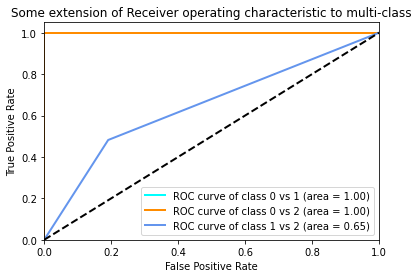

In [282]:
from scipy import interp
from itertools import cycle
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} vs {1} (area = {2:0.2f})'
             ''.format(comp[i][0], comp[i][1], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
"""
If we compare multiclass classification using decision tree and onevsone strategy for the same problem one thing 
that we can see is that the output of both were pretty much the same. 
Confusion Matrix for decision tree multiclass classifier: 
 [[ 1139     0   264]
 [    0 11733     0]
 [  142     0   311]] 
 
Confusion matrix using onevsone classifier: 
[[ 1221     0   182]
 [    0 11733     0]
 [  230     0   223]] 
 
Accuracy for both the methods are pretty much the same with 0.97. 

Also, the data is highly imbalanced with 94 percent marked with 'nonexistent' label and remaining ones in 'success' 
and 'failure'. Also it seems that the learner is very accurately able to classify the class 'non-existent'. Two potential
reasons for the same could be:
1. Highly biased data for class "nonexistent" which is totally our case
2. The boundary between class "nonexistent" and other classes is precisely distinct to accurately classify which is ideal.

When compared binary classification problem to multiclassification problem; the main difference is that in binary classification
problem classification has to be done between 2 classes while that in multiclassification the instance has to be classified 
into more than 2 classes. So the complexity in case of multiclassification problem increases as every class has to be 
distinctly classified from other. 

So, if you have 3 class problem, with roughly 10 examples in each class. If you adopt one vs rest strategy, you will have to 
design 3 classifiers that are supposed to discriminate a class with 10 examples from the rest class, which has 2N examples in 
total. Then in that case, it will always all examples to rest class with a higher accuracy of greater than equal to 90 percent.
This means that accuracy alone cannot decide the performance in our case; Hence we might get confused with class imbalance 
problem. While in binary case this distribution of one vs rest would be avoided as there would be N examples in both the 
classes. This would be one of the major issues need to be handled. 
"""